In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def ReadMuonData(filepath, tree, mu_minus, outdir):

    file = uproot.open(filepath)
    tree = file[tree]

    decid = tree["decid"].array()
    evt = tree["evt"].array()
    gen_n = tree["gen_n"].array()
    intid = tree["intid"].array()
    kinE = tree["kinE"].array()
    pid = tree["pid"].array()
    run = tree["run"].array()
    weight = tree["weight"].array()
    x = tree["x"].array()
    xdec = tree["xdec"].array()
    xdircos = tree["xdircos"].array()
    xint = tree["xint"].array()
    y = tree["y"].array()
    ydec = tree["ydec"].array()
    ydircos = tree["ydircos"].array()
    yint = tree["yint"].array()
    z = tree["z"].array()
    zdec = tree["zdec"].array()
    zint = tree["zint"].array()

    file.close()

    n_events = len(kinE)
    m = 0.1056583745
    p = np.sqrt(kinE**2 - m**2)
    py = -xdircos*p
    pz = ydircos*p
    px = p*np.sqrt(1-xdircos**2-ydircos**2)

    theta = np.arccos(pz/p)
    phi = np.arctan2(py, px)
    eta = 0.5*np.log((p+pz)/(p-pz))
    pt = np.sqrt(px**2+py**2)
    
    event_id = np.arange(0, n_events)
    process = np.zeros(n_events)
    vt = np.zeros(n_events)
    m_arr = m*np.ones(n_events)
    vertex_primary = np.ones(n_events)
    vertex_secondary = np.zeros(n_events)
    particle = np.ones(n_events)
    generation = np.zeros(n_events)
    sub_particle = np.zeros(n_events)

    if mu_minus:
        q = -1*np.ones(n_events)
        particle_type = np.ones(n_events)*13
        particle_id = np.ones(n_events)*4503599644147712
    else:
        q = np.ones(n_events)
        particle_type = np.ones(n_events)*(-13)
        particle_id = np.ones(n_events)*4503599644147712

    df_acts = pd.DataFrame(data = {"event_id": event_id, 
                              "particle_id": particle_id, 
                              "particle_type": particle_type, 
                              "process": process,
                              "vx": z,
                              "vy": -x,
                              "vz": y,
                              "vt": vt,
                              "px": px, 
                              "py": py, 
                              "pz": pz, 
                              "m": m_arr,
                              "q": q,
                              "eta": eta,
                              "phi": phi, 
                              "theta": theta, 
                              "pt": pt,
                              "p": p,
                              "vertex_primary": vertex_primary,
                              "vertex_secondary": vertex_secondary,
                              "particle": particle,
                              "generation": generation,
                              "sub_particle": sub_particle})

    if mu_minus:
        tree_name = "nmuon_data"
    else:
        tree_name = "pmuon_data"

    outdir[tree_name] = df_acts
    
    return df_acts

In [3]:
file = uproot.open("../macros/ROOT/Nmu_data.root")
tree = file["mu_minus"]

In [4]:
decid = tree["decid"].array()
evt = tree["evt"].array()
gen_n = tree["gen_n"].array()
intid = tree["intid"].array()
kinE = tree["kinE"].array()
pid = tree["pid"].array()
run = tree["run"].array()
weight = tree["weight"].array()
x = tree["x"].array()
xdec = tree["xdec"].array()
xdircos = tree["xdircos"].array()
xint = tree["xint"].array()
y = tree["y"].array()
ydec = tree["ydec"].array()
ydircos = tree["ydircos"].array()
yint = tree["yint"].array()
z = tree["z"].array()
zdec = tree["zdec"].array()
zint = tree["zint"].array()


In [5]:
file.close()

In [7]:
df = pd.DataFrame(data = {"decid": decid, 
                          "evt": evt, 
                          "gen_n": gen_n, 
                          "intid": intid,
                          "kinE": kinE,
                          "pid": pid,
                          "run": run,
                          "weight": weight, 
                          "x": x, 
                          "xdec": xdec, 
                          "xdircos": xdircos,
                          "xint": xint,
                          "y": y, 
                          "ydec": ydec, 
                          "ydircos": ydircos,
                          "yint": yint,
                          "z": z,
                          "zdec": zdec,
                          "zint": zint})
df

,decid,evt,gen_n,intid,kinE,pid,run,weight,x,xdec,xdircos,xint,y,ydec,ydircos,yint,z,zdec,zint
0,0,5,1,0,1253.342179,11,0,0.003900,-264.645534,0.0,-0.002714,0.000000,-3.601516,0.0,-0.000100,0.000000,61672.913960,0.0,0.000000
1,0,38,1,0,301.068500,11,0,0.003900,-4.640475,0.0,0.003872,0.000000,238.674864,0.0,0.005835,0.000000,61696.849643,0.0,0.000000
2,0,53,1,0,284.568318,11,0,0.003900,78.527952,0.0,0.002670,0.000000,168.278322,0.0,0.007507,0.000000,61704.506006,0.0,0.000000
3,0,57,1,0,16.282983,11,0,0.004655,-354.754540,0.0,0.000246,0.000000,215.377326,0.0,0.011749,0.000000,61664.618657,0.0,0.000000
4,0,61,4,11,675.286283,11,0,0.003900,-358.357218,0.0,-0.008343,-331.447012,-26.756488,0.0,-0.000589,-25.173062,61664.287000,0.0,58305.189471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13143986,0,13071,1,0,4.329261,11,969,0.008902,342.168962,0.0,0.022754,0.000000,340.597212,0.0,0.008816,0.000000,61728.776410,0.0,0.000000
13143987,0,13075,2,11,1095.077462,11,969,0.003900,-263.241216,0.0,-0.004649,-256.653344,254.282123,0.0,0.004583,247.941197,61673.043239,0.0,60288.593390
13143988,0,13076,2,11,593.753331,11,969,0.003900,-261.468379,0.0,-0.003882,-224.665008,127.531009,0.0,0.004508,89.663353,61673.206444,0.0,53346.490852
13143989,0,13083,2,11,102.059648,11,969,0.005404,-18.939022,0.0,-0.003124,-18.221140,321.707263,0.0,0.000616,321.554922,61695.533340,0.0,61487.943559


In [5]:
df_scatter = df[["x", "y", "z", "kinE", "weight", "xdircos", "ydircos"]]
df_scatter

,x,y,z,kinE,weight,xdircos,ydircos
0,-264.645534,-3.601516,61672.913960,1253.342179,0.003900,-0.002714,-0.000100
1,-4.640475,238.674864,61696.849643,301.068500,0.003900,0.003872,0.005835
2,78.527952,168.278322,61704.506006,284.568318,0.003900,0.002670,0.007507
3,-354.754540,215.377326,61664.618657,16.282983,0.004655,0.000246,0.011749
4,-358.357218,-26.756488,61664.287000,675.286283,0.003900,-0.008343,-0.000589
...,...,...,...,...,...,...,...
13143986,342.168962,340.597212,61728.776410,4.329261,0.008902,0.022754,0.008816
13143987,-263.241216,254.282123,61673.043239,1095.077462,0.003900,-0.004649,0.004583
13143988,-261.468379,127.531009,61673.206444,593.753331,0.003900,-0.003882,0.004508
13143989,-18.939022,321.707263,61695.533340,102.059648,0.005404,-0.003124,0.000616


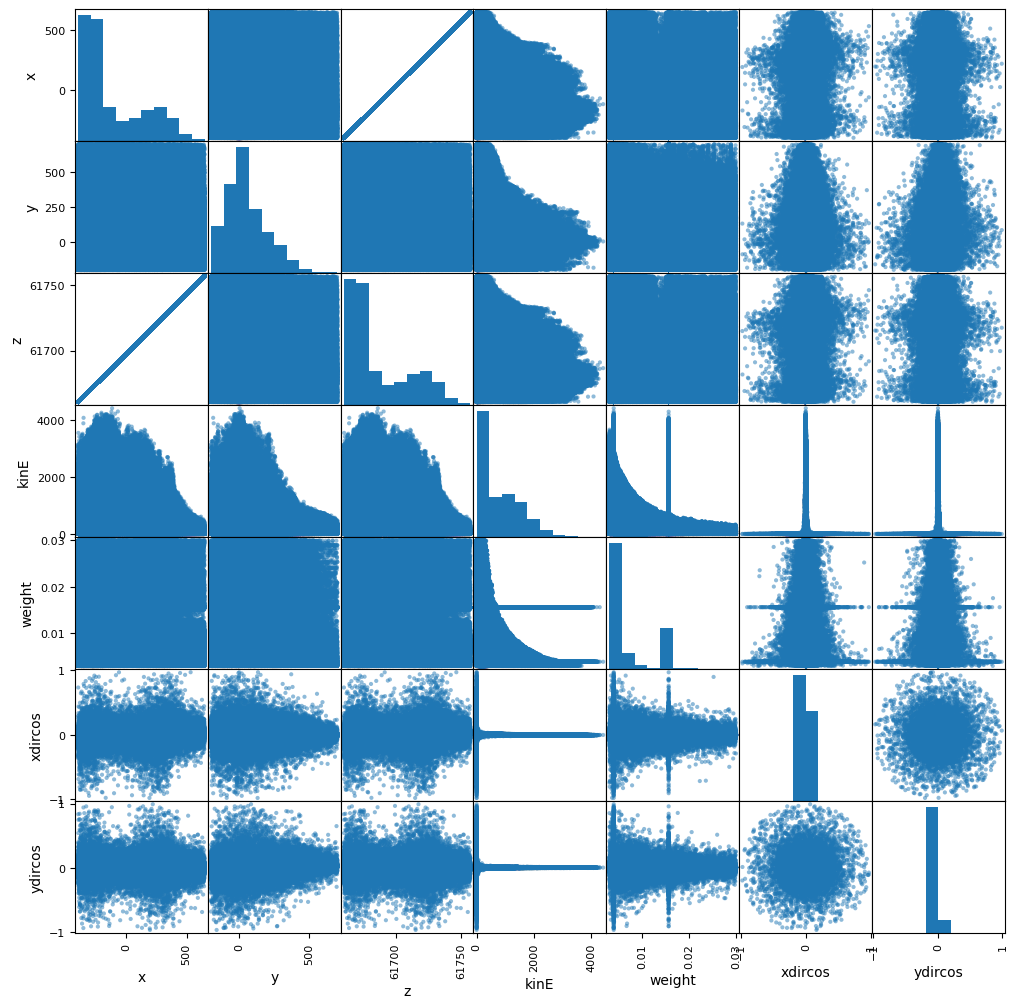

<Figure size 640x480 with 0 Axes>

In [15]:
pd.plotting.scatter_matrix(df_scatter, figsize = (12, 12))
plt.show()
plt.savefig("scatter_matrix.png")

In [7]:
n_events = len(kinE)
m = 0.1056583745
p = np.sqrt(kinE**2 - m**2)

#ACTS GEOMETRY VARIABLES
py = -xdircos*p
pz = ydircos*p
px = p*np.sqrt(1-xdircos**2-ydircos**2)

#SIMULATION GEOMETRY VARIABLES
#px = xdircos*p
#py = ydircos*p
#pz = p*np.sqrt(1-xdircos**2-ydircos**2)

theta = np.arccos(pz/p)
phi = np.arctan2(py, px)
eta = 0.5*np.log((p+pz)/(p-pz))
pt = np.sqrt(px**2+py**2)
event_id = np.arange(0, n_events)
particle_id = np.ones(n_events)*4503599644147712
particle_type = np.ones(n_events)*13
process = np.zeros(n_events)
vt = np.zeros(n_events)
m_arr = m*np.ones(n_events)
q = np.ones(n_events)
vertex_primary = np.ones(n_events)
vertex_secondary = np.zeros(n_events)
particle = np.ones(n_events)
generation = np.zeros(n_events)
sub_particle = np.zeros(n_events)

In [9]:
df_new = pd.DataFrame(data = {"event_id": event_id, 
                              "particle_id": particle_id, 
                              "particle_type": particle_type, 
                              "process": process,
                              "vx": x,
                              "vy": y,
                              "vz": z,
                              "vt": vt,
                              "px": px, 
                              "py": py, 
                              "pz": pz, 
                              "m": m_arr,
                              "q": q,
                              "eta": eta,
                              "phi": phi, 
                              "theta": theta, 
                              "pt": pt,
                              "p": p,
                              "vertex_primary": vertex_primary,
                              "vertex_secondary": vertex_secondary,
                              "particle": particle,
                              "generation": generation,
                              "sub_particle": sub_particle})
df_new

,event_id,particle_id,particle_type,process,vx,vy,vz,vt,px,py,...,eta,phi,theta,pt,p,vertex_primary,vertex_secondary,particle,generation,sub_particle
0,0,4.503600e+15,13.0,0.0,-264.645534,-3.601516,61672.913960,0.0,-3.401221,-0.124827,...,6.601907,-3.104909,0.002716,3.403511,1253.342175,1.0,0.0,1.0,0.0,0.0
1,1,4.503600e+15,13.0,0.0,-4.640475,238.674864,61696.849643,0.0,1.165768,1.756667,...,5.654595,0.984902,0.007003,2.108292,301.068482,1.0,0.0,1.0,0.0,0.0
2,2,4.503600e+15,13.0,0.0,78.527952,168.278322,61704.506006,0.0,0.759817,2.136134,...,5.525540,1.229055,0.007967,2.267242,284.568299,1.0,0.0,1.0,0.0,0.0
3,3,4.503600e+15,13.0,0.0,-354.754540,215.377326,61664.618657,0.0,0.004013,0.191304,...,5.136885,1.549823,0.011752,0.191346,16.282640,1.0,0.0,1.0,0.0,0.0
4,4,4.503600e+15,13.0,0.0,-358.357218,-26.756488,61664.287000,0.0,-5.634100,-0.397935,...,5.476941,-3.071080,0.008364,5.648135,675.286275,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13143986,13143986,4.503600e+15,13.0,0.0,342.168962,340.597212,61728.776410,0.0,0.098481,0.038154,...,4.406067,0.369621,0.024405,0.105613,4.327972,1.0,0.0,1.0,0.0,0.0
13143987,13143987,4.503600e+15,13.0,0.0,-263.241216,254.282123,61673.043239,0.0,-5.090469,5.019127,...,5.724781,2.363251,0.006528,7.148741,1095.077457,1.0,0.0,1.0,0.0,0.0
13143988,13143988,4.503600e+15,13.0,0.0,-261.468379,127.531009,61673.206444,0.0,-2.305115,2.676717,...,5.817604,2.281741,0.005949,3.532474,593.753322,1.0,0.0,1.0,0.0,0.0
13143989,13143989,4.503600e+15,13.0,0.0,-18.939022,321.707263,61695.533340,0.0,-0.318821,0.062840,...,6.442770,2.946985,0.003184,0.324955,102.059594,1.0,0.0,1.0,0.0,0.0


In [19]:
df_scatter_new = df_new[["vx", "vy", "vz", "px", "py", "pz", "eta", "phi", "theta", "pt", "p"]]

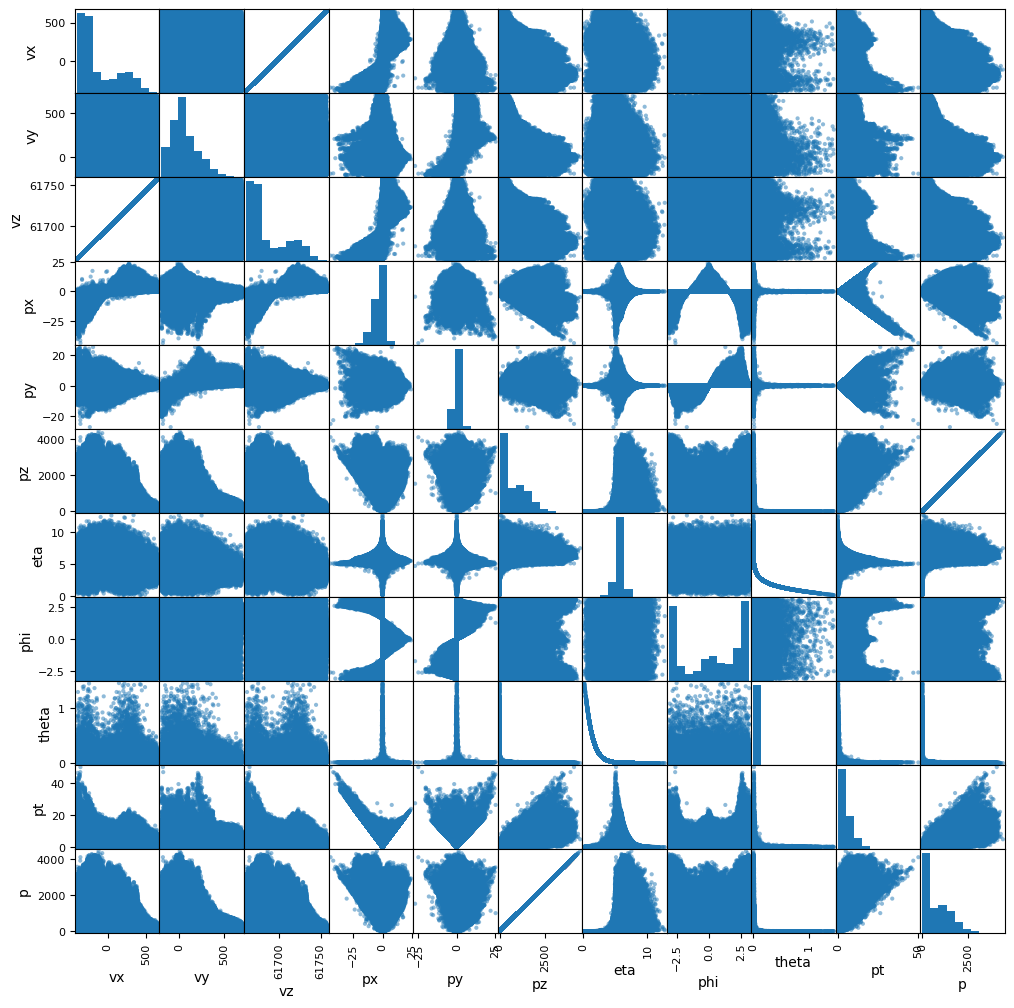

<Figure size 640x480 with 0 Axes>

In [20]:
pd.plotting.scatter_matrix(df_scatter_new, figsize = (12, 12))
plt.show()
plt.savefig("scatter_matrix_new.png")

In [10]:
df_acts = pd.DataFrame(data = {"event_id": event_id, 
                              "particle_id": particle_id, 
                              "particle_type": particle_type, 
                              "process": process,
                              "vx": z,
                              "vy": -x,
                              "vz": y,
                              "vt": vt,
                              "px": pz, 
                              "py": -px, 
                              "pz": py, 
                              "m": m_arr,
                              "q": q,
                              "eta": eta,
                              "phi": phi, 
                              "theta": theta, 
                              "pt": pt,
                              "p": p,
                              "vertex_primary": vertex_primary,
                              "vertex_secondary": vertex_secondary,
                              "particle": particle,
                              "generation": generation,
                              "sub_particle": sub_particle})
df_acts

,event_id,particle_id,particle_type,process,vx,vy,vz,vt,px,py,...,eta,phi,theta,pt,p,vertex_primary,vertex_secondary,particle,generation,sub_particle
0,0,4.503600e+15,13.0,0.0,61672.913960,264.645534,-3.601516,0.0,1253.337553,3.401221,...,6.601907,-3.104909,0.002716,3.403511,1253.342175,1.0,0.0,1.0,0.0,0.0
1,1,4.503600e+15,13.0,0.0,61696.849643,4.640475,238.674864,0.0,301.061100,-1.165768,...,5.654595,0.984902,0.007003,2.108292,301.068482,1.0,0.0,1.0,0.0,0.0
2,2,4.503600e+15,13.0,0.0,61704.506006,-78.527952,168.278322,0.0,284.559267,-0.759817,...,5.525540,1.229055,0.007967,2.267242,284.568299,1.0,0.0,1.0,0.0,0.0
3,3,4.503600e+15,13.0,0.0,61664.618657,354.754540,215.377326,0.0,16.281516,-0.004013,...,5.136885,1.549823,0.011752,0.191346,16.282640,1.0,0.0,1.0,0.0,0.0
4,4,4.503600e+15,13.0,0.0,61664.287000,358.357218,-26.756488,0.0,675.262653,5.634100,...,5.476941,-3.071080,0.008364,5.648135,675.286275,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13143986,13143986,4.503600e+15,13.0,0.0,61728.776410,-342.168962,340.597212,0.0,4.326683,-0.098481,...,4.406067,0.369621,0.024405,0.105613,4.327972,1.0,0.0,1.0,0.0,0.0
13143987,13143987,4.503600e+15,13.0,0.0,61673.043239,263.241216,254.282123,0.0,1095.054123,5.090469,...,5.724781,2.363251,0.006528,7.148741,1095.077457,1.0,0.0,1.0,0.0,0.0
13143988,13143988,4.503600e+15,13.0,0.0,61673.206444,261.468379,127.531009,0.0,593.742813,2.305115,...,5.817604,2.281741,0.005949,3.532474,593.753322,1.0,0.0,1.0,0.0,0.0
13143989,13143989,4.503600e+15,13.0,0.0,61695.533340,18.939022,321.707263,0.0,102.059076,0.318821,...,6.442770,2.946985,0.003184,0.324955,102.059594,1.0,0.0,1.0,0.0,0.0


In [11]:
output_directory = uproot.create("muon_acts_combined.root")

df_nmuon = ReadMuonData("../macros/ROOT/Nmu_data.root", "mu_minus", True, output_directory)
df_pmuon = ReadMuonData("../macros/ROOT/Pmu_data.root", "mu_plus", False, output_directory)

output_directory.close()

c:\Users\luke\anaconda3\lib\site-packages\awkward\_nplikes\array_module.py:271: RuntimeWarning: invalid value encountered in sqrt
  return impl(*non_generic_value_promoted_args, **(kwargs or {}))
c:\Users\luke\anaconda3\lib\site-packages\awkward\_nplikes\array_module.py:271: RuntimeWarning: invalid value encountered in sqrt
  return impl(*non_generic_value_promoted_args, **(kwargs or {}))


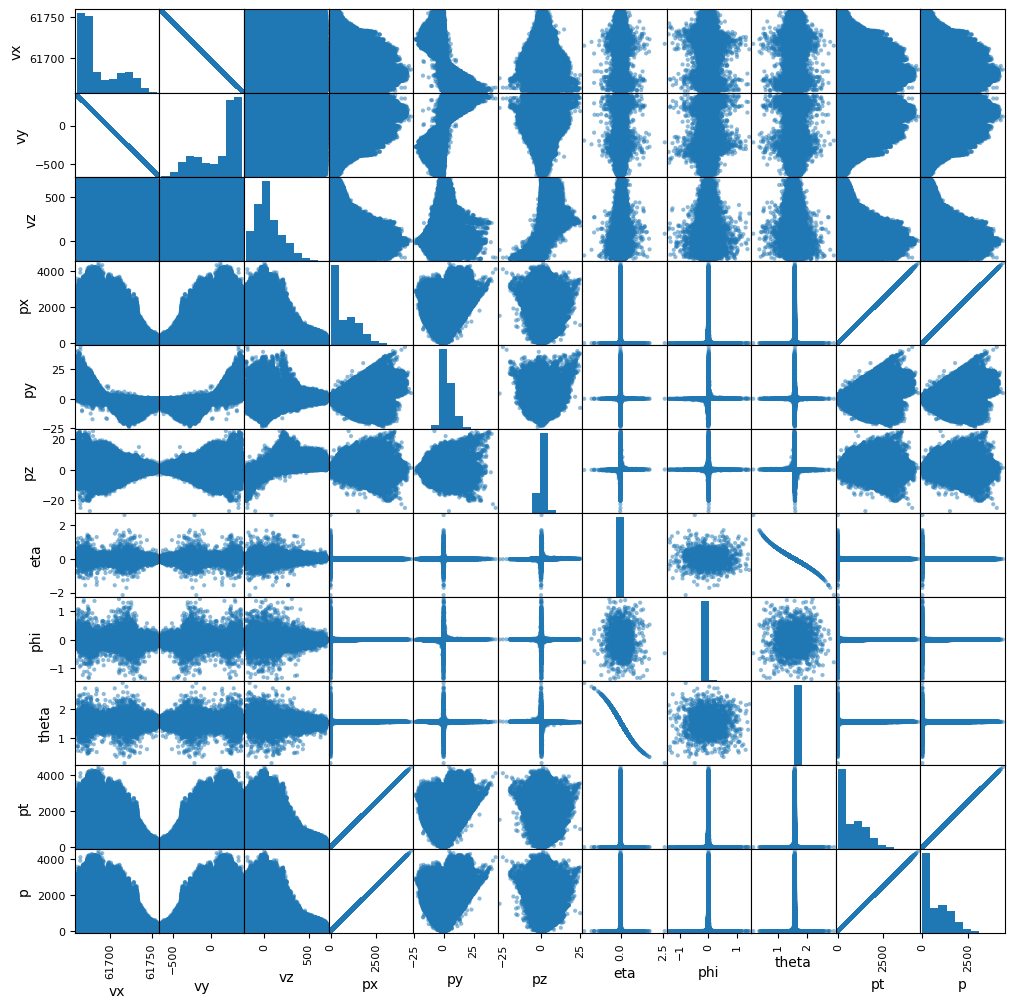

<Figure size 640x480 with 0 Axes>

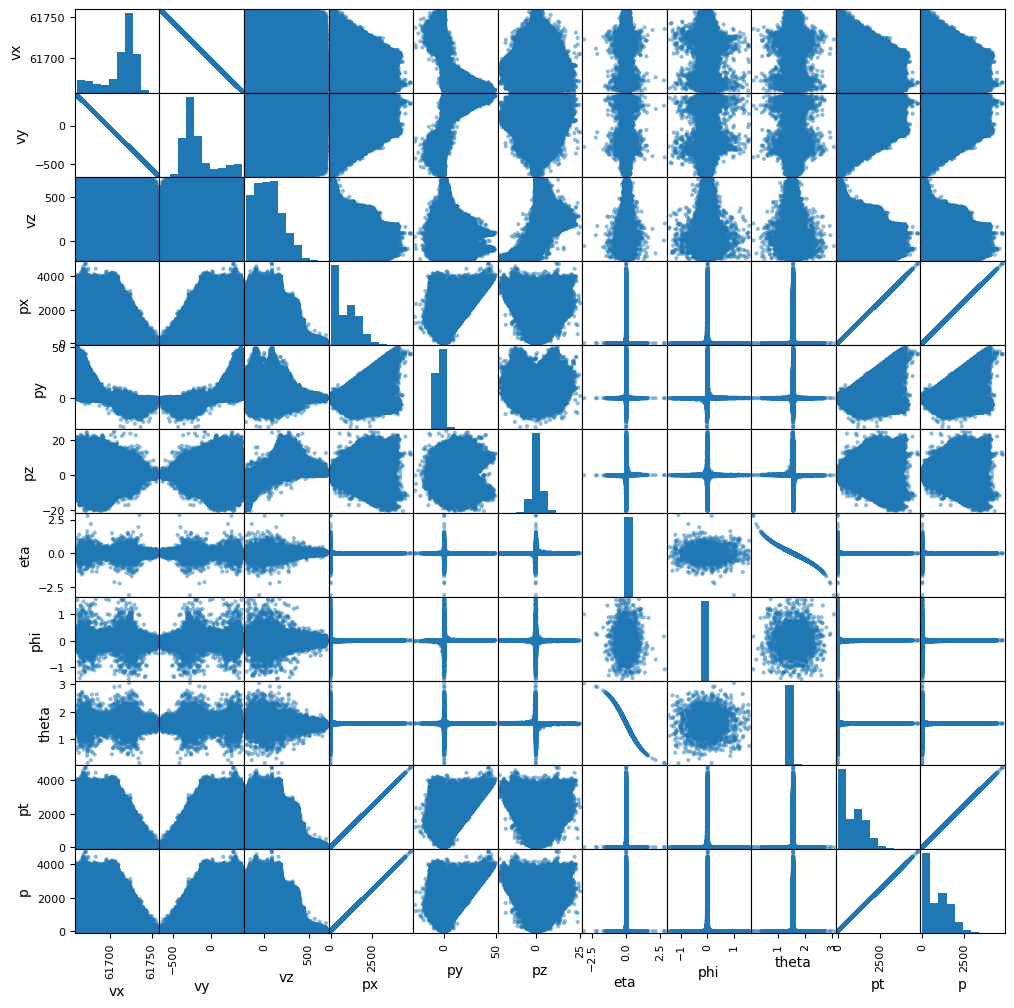

<Figure size 640x480 with 0 Axes>

In [5]:
df_scatter_acts_n = df_nmuon[["vx", "vy", "vz", "px", "py", "pz", "eta", "phi", "theta", "pt", "p"]]
df_scatter_acts_p = df_pmuon[["vx", "vy", "vz", "px", "py", "pz", "eta", "phi", "theta", "pt", "p"]]

pd.plotting.scatter_matrix(df_scatter_acts_n, figsize = (12, 12))
plt.savefig("scatter_matrix_nmuon.png")
plt.show()

pd.plotting.scatter_matrix(df_scatter_acts_p, figsize = (12, 12))
plt.savefig("scatter_matrix_pmuon.png")
plt.show()

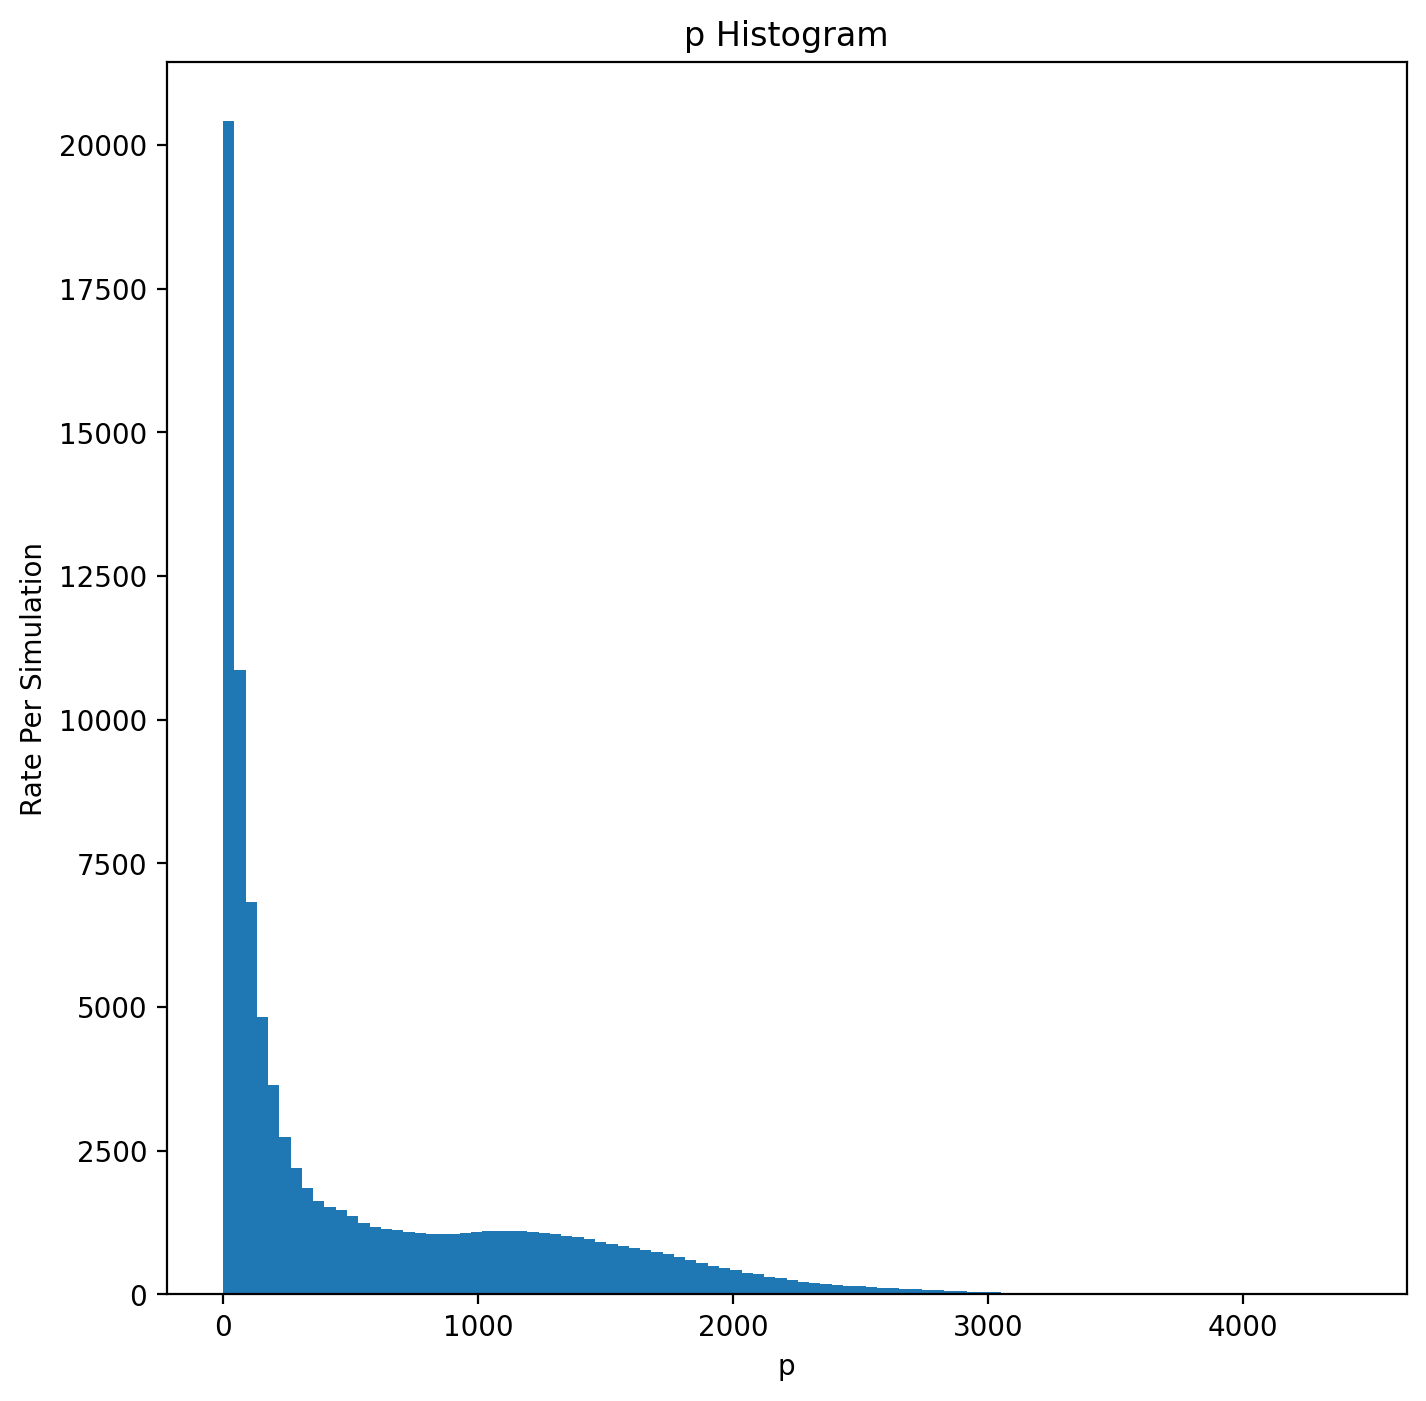

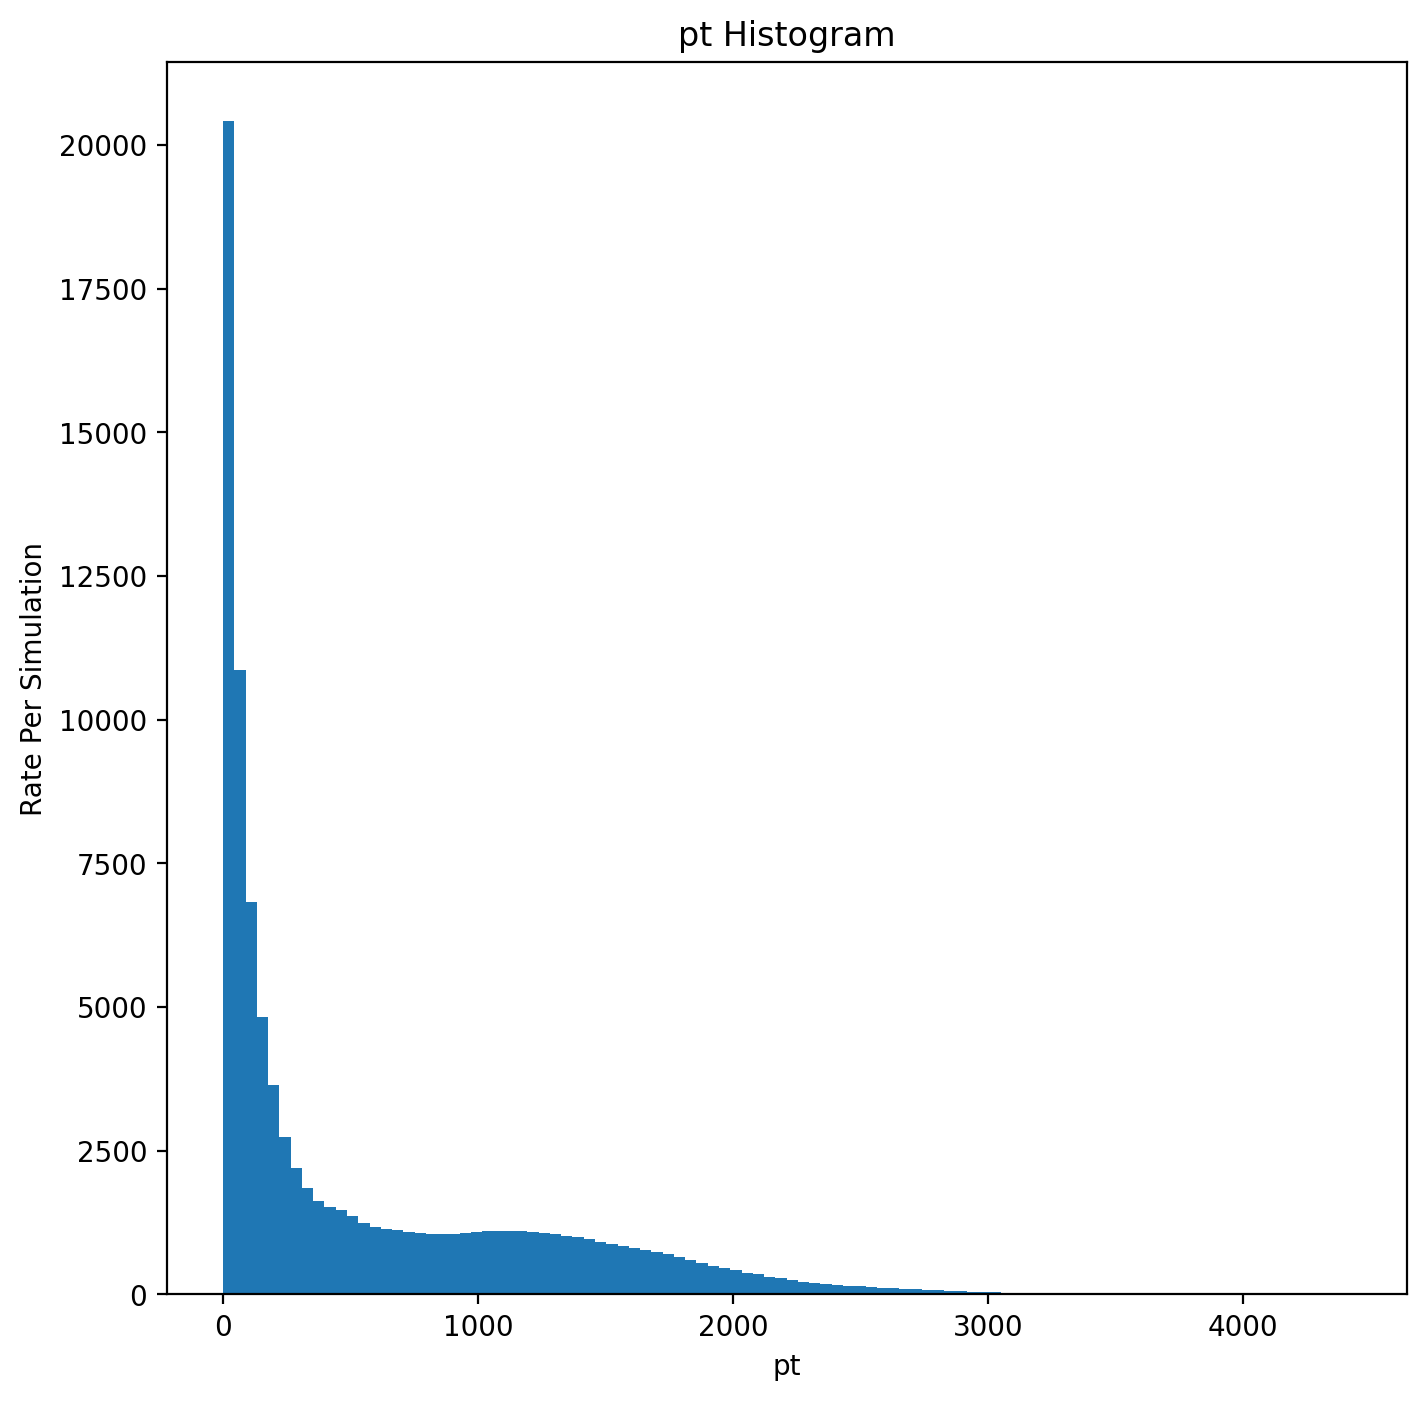

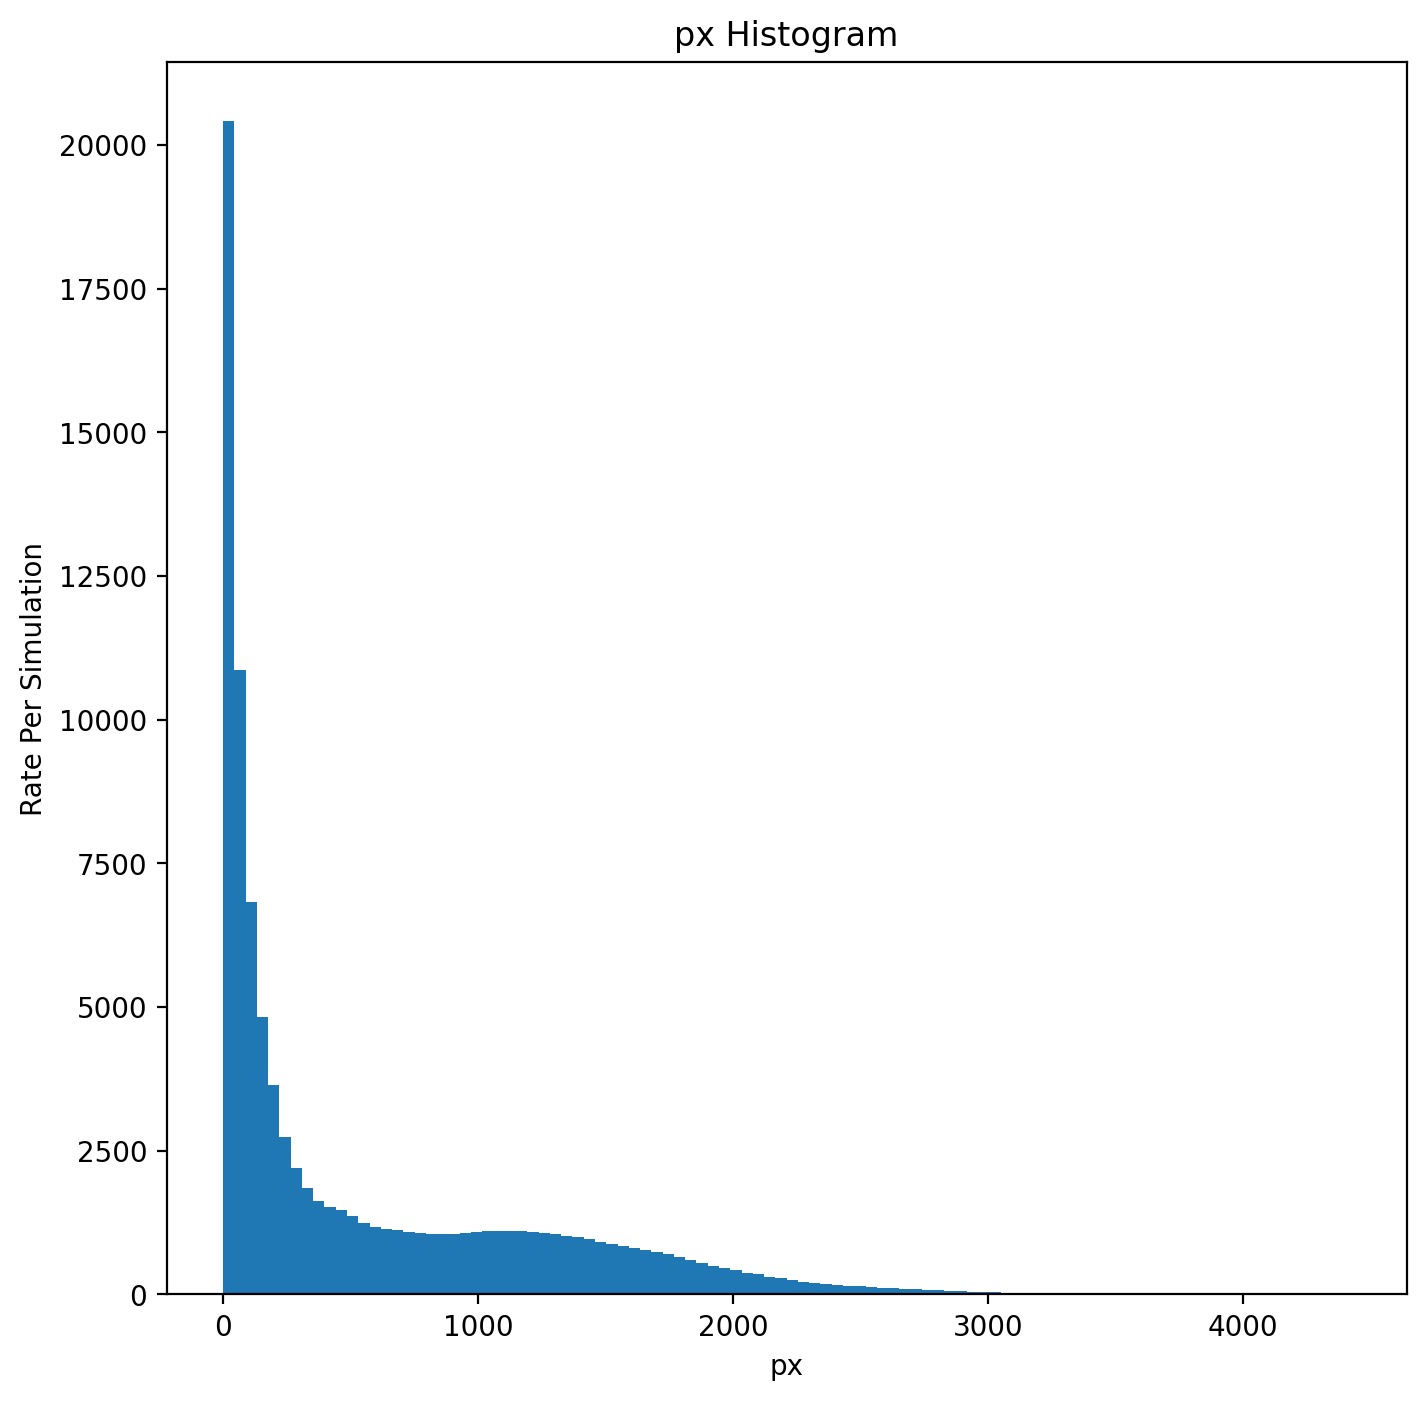

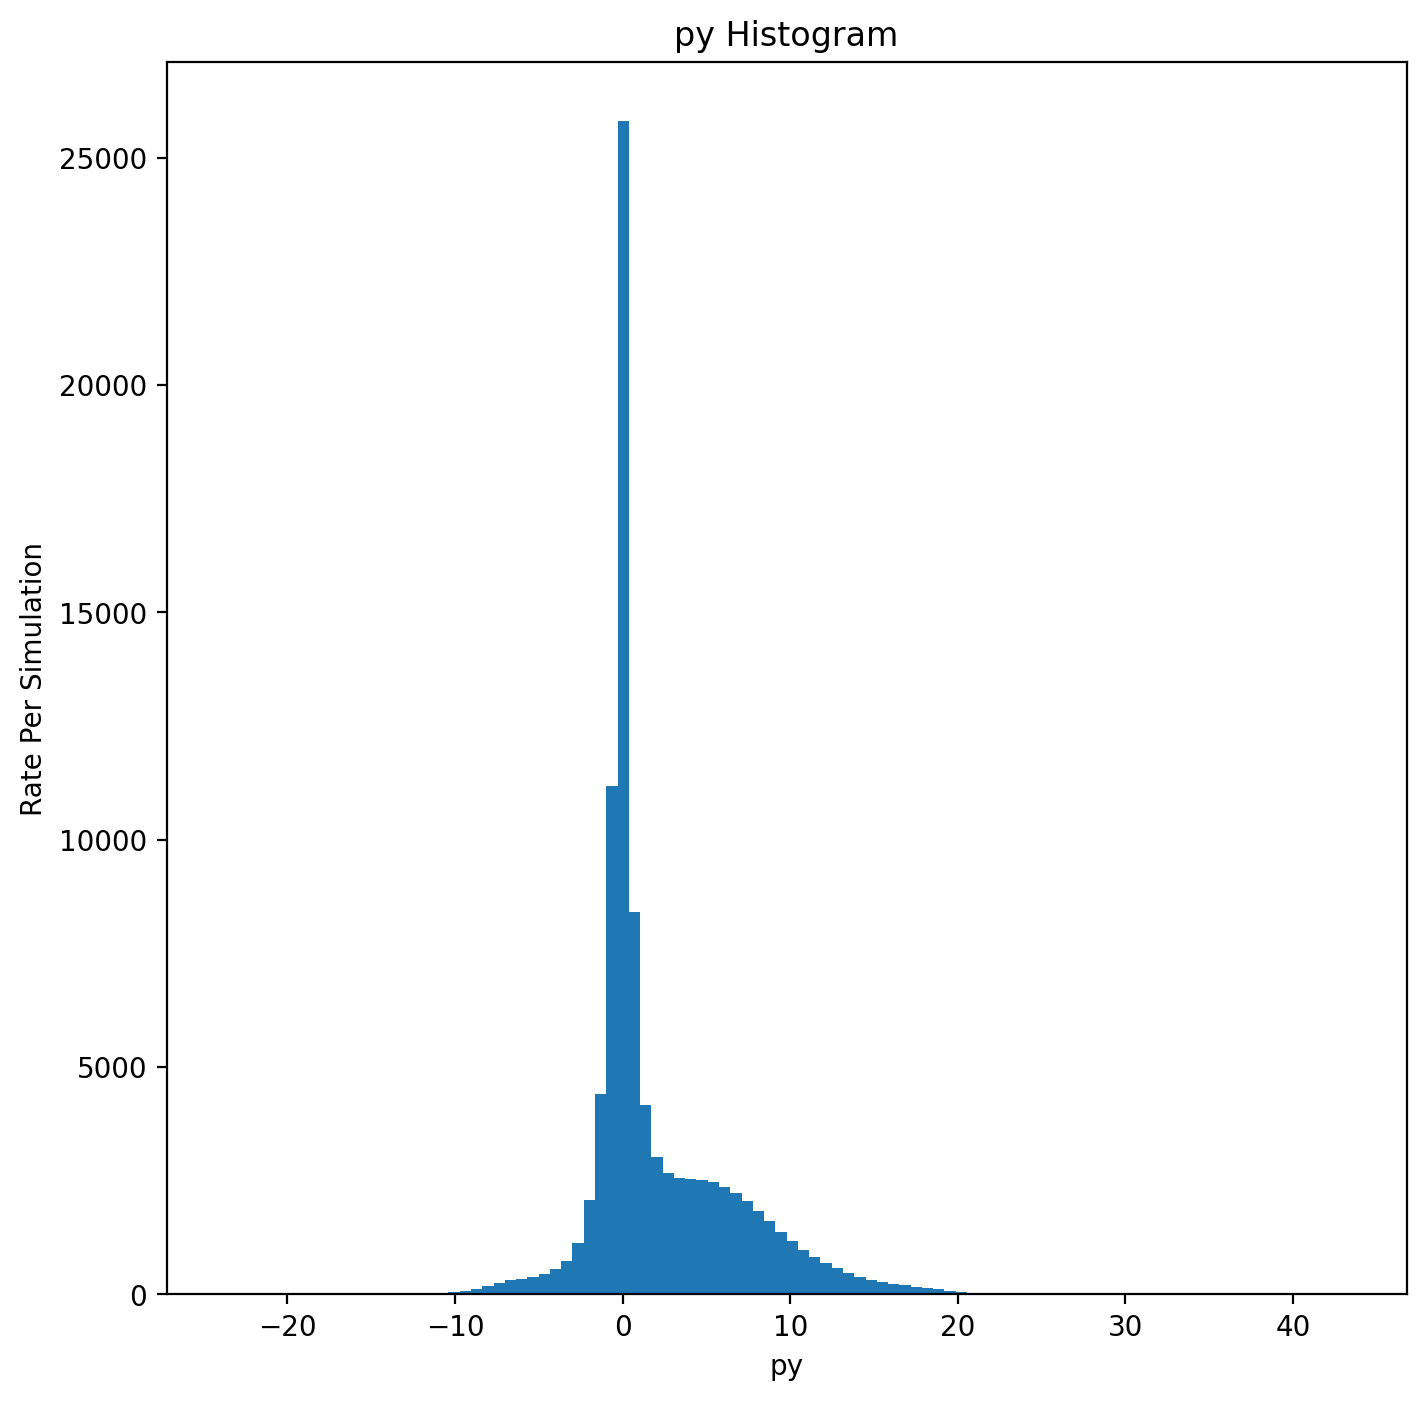

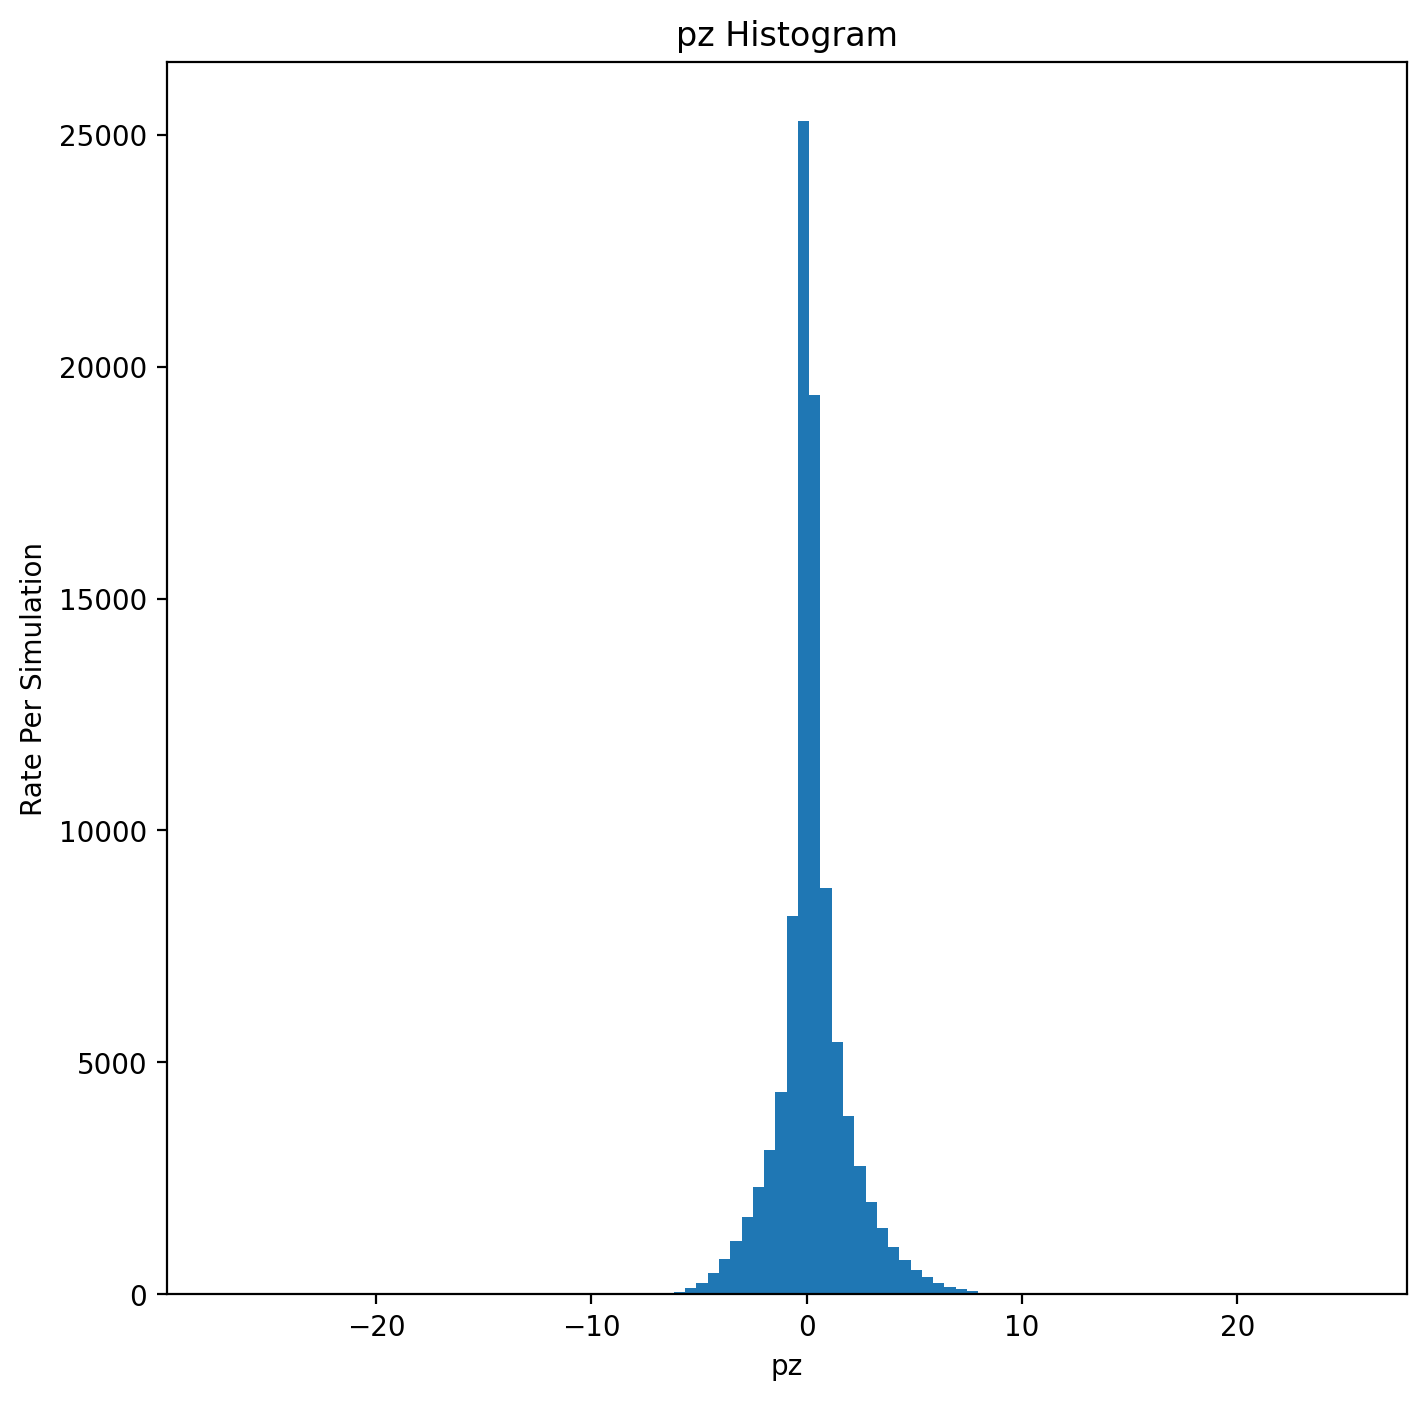

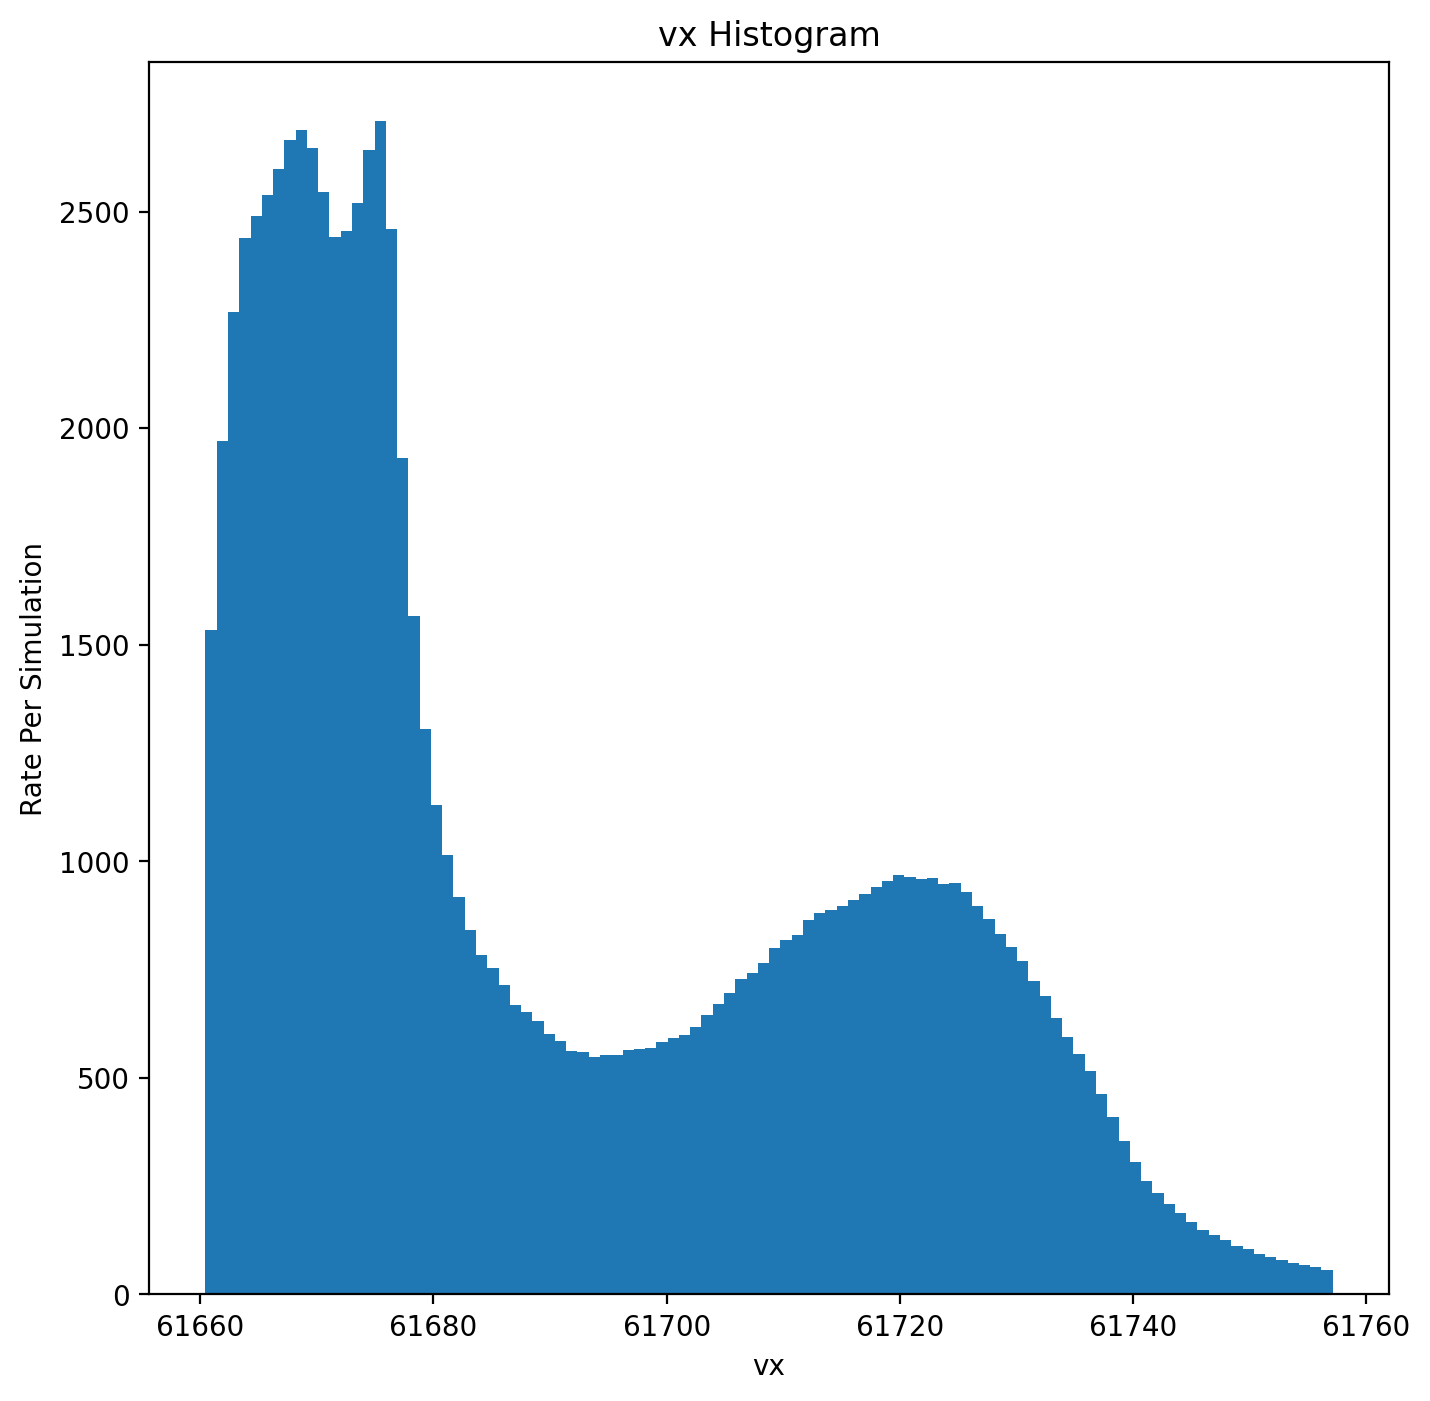

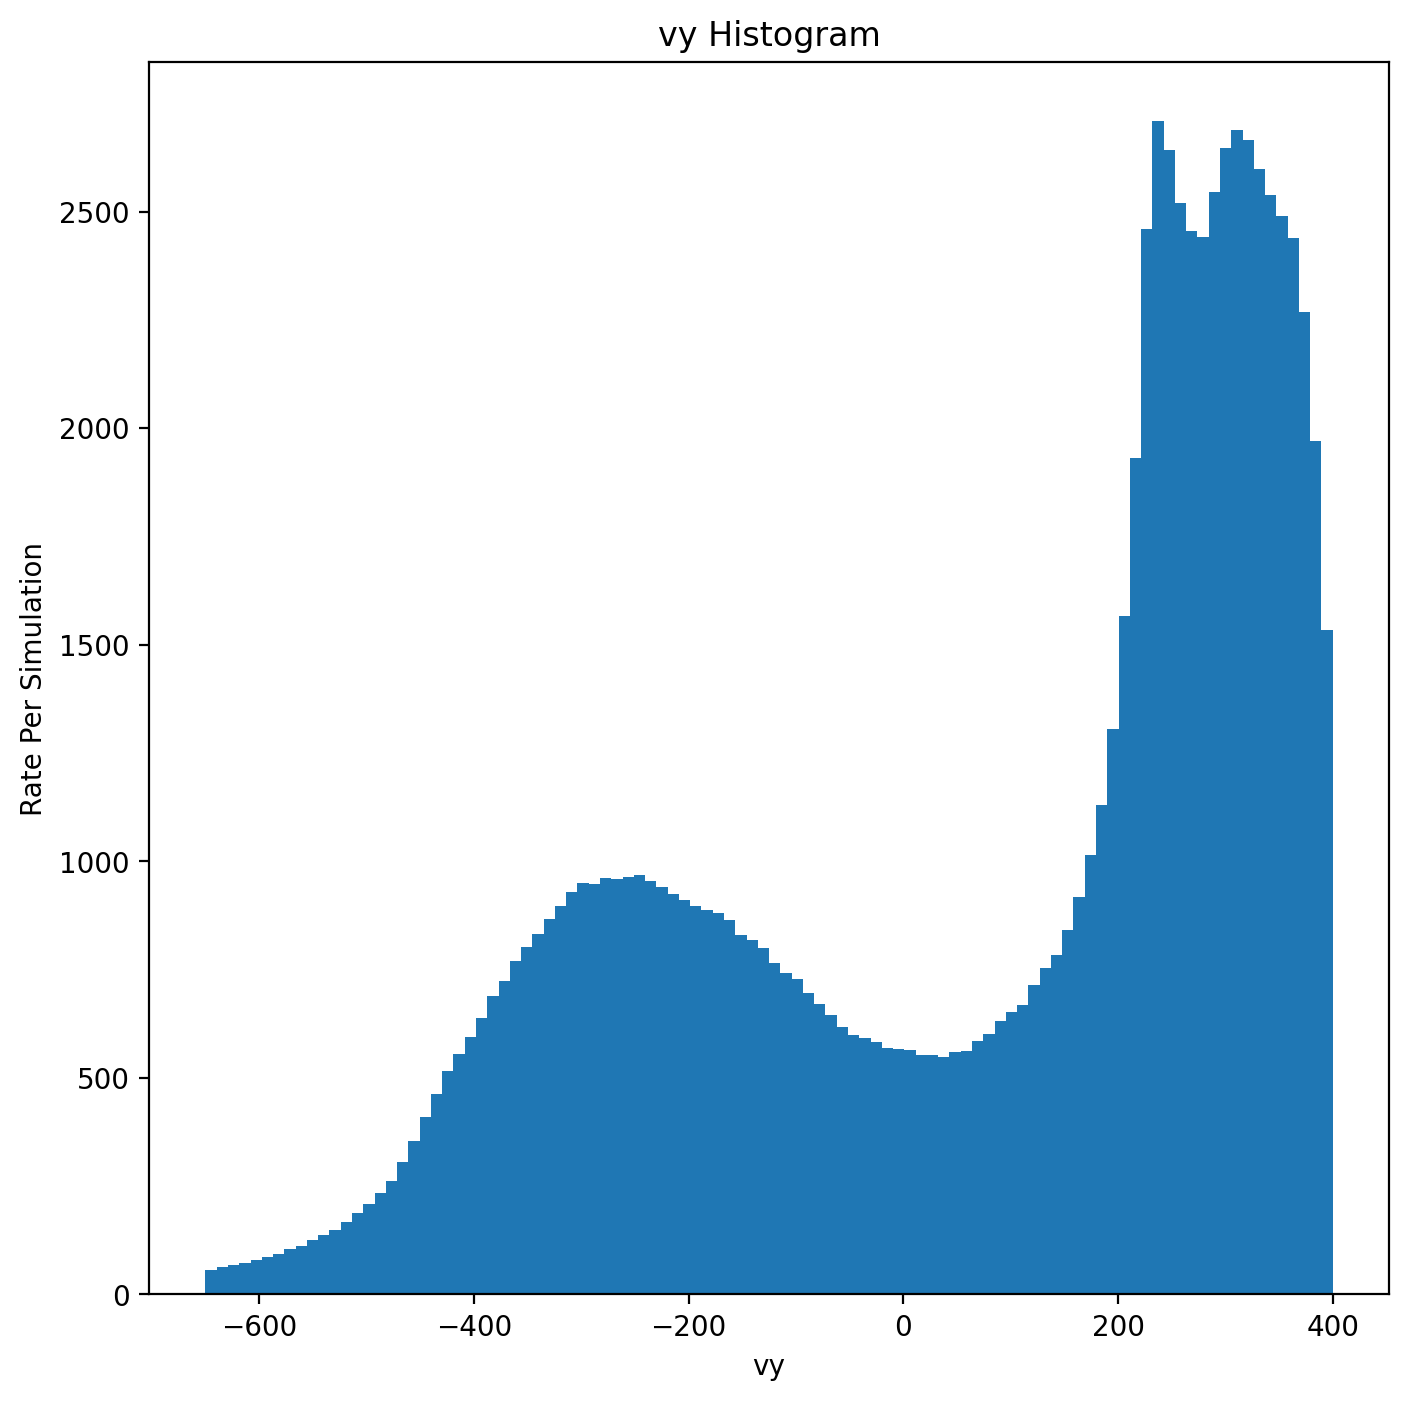

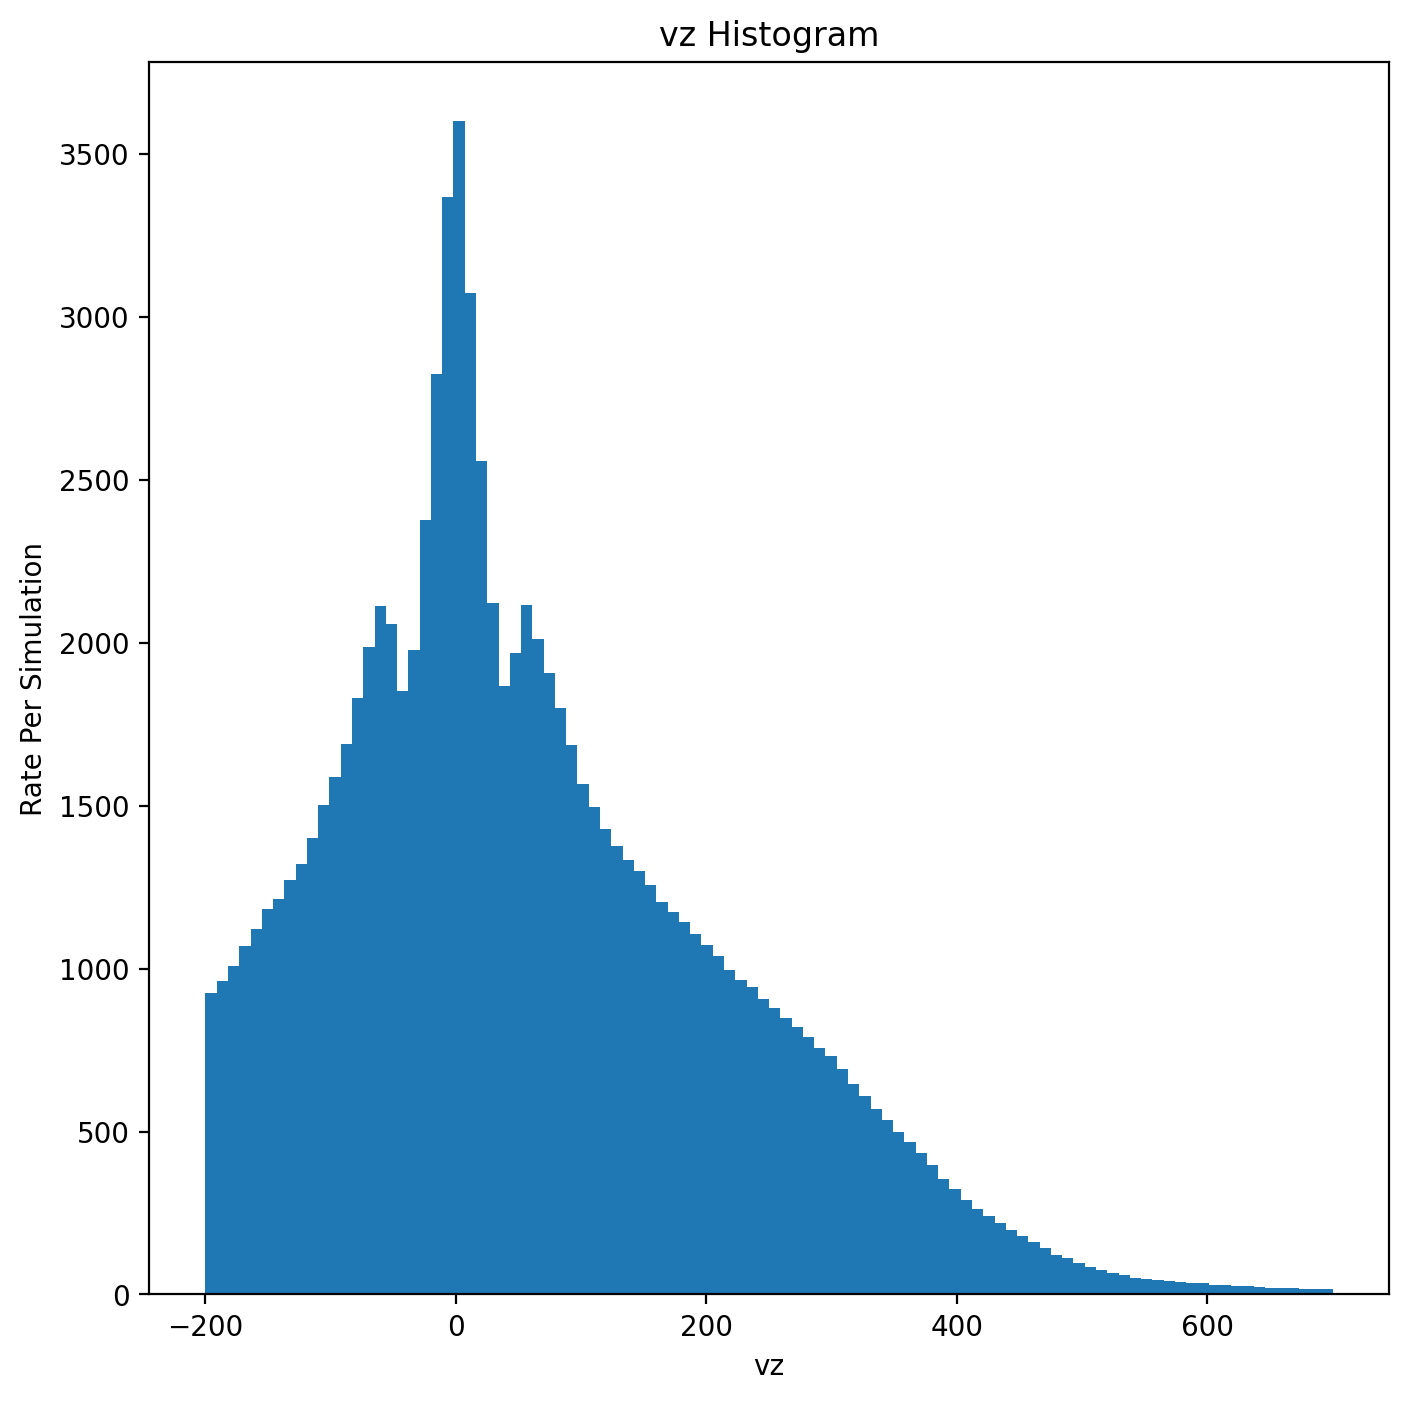

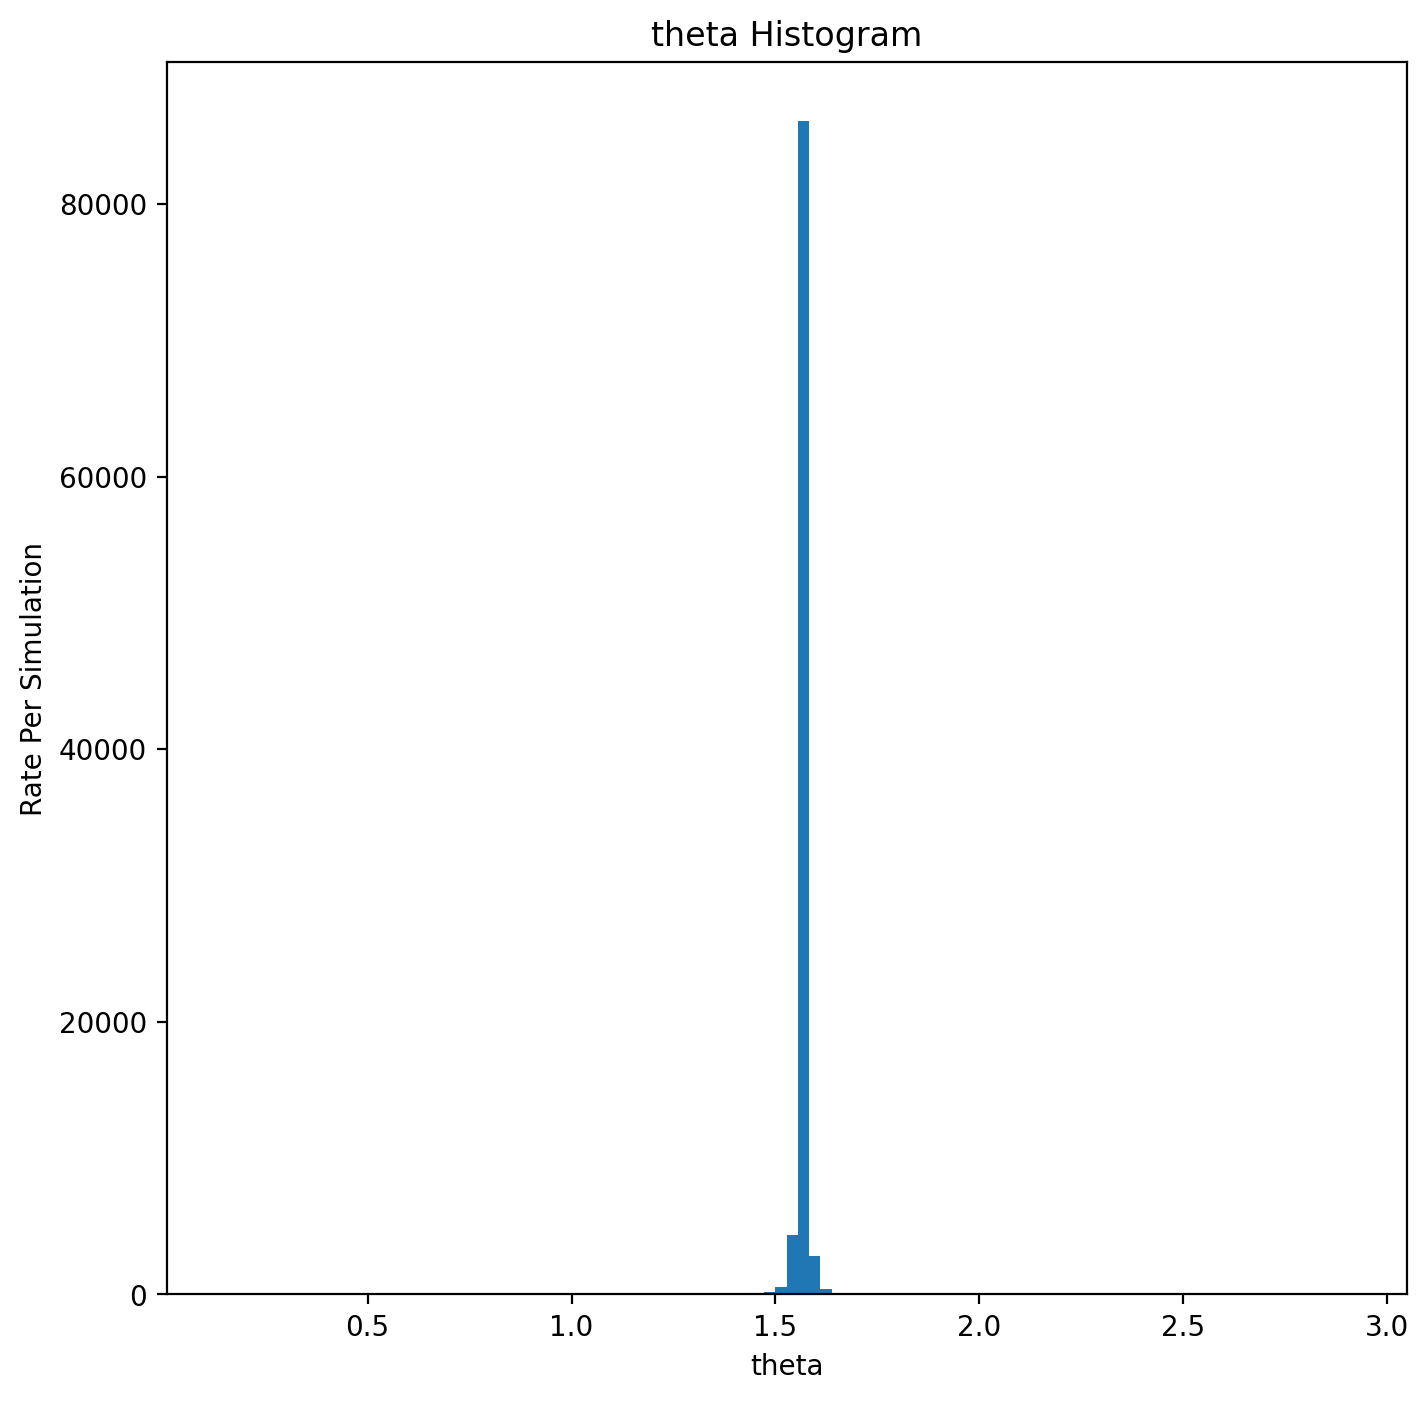

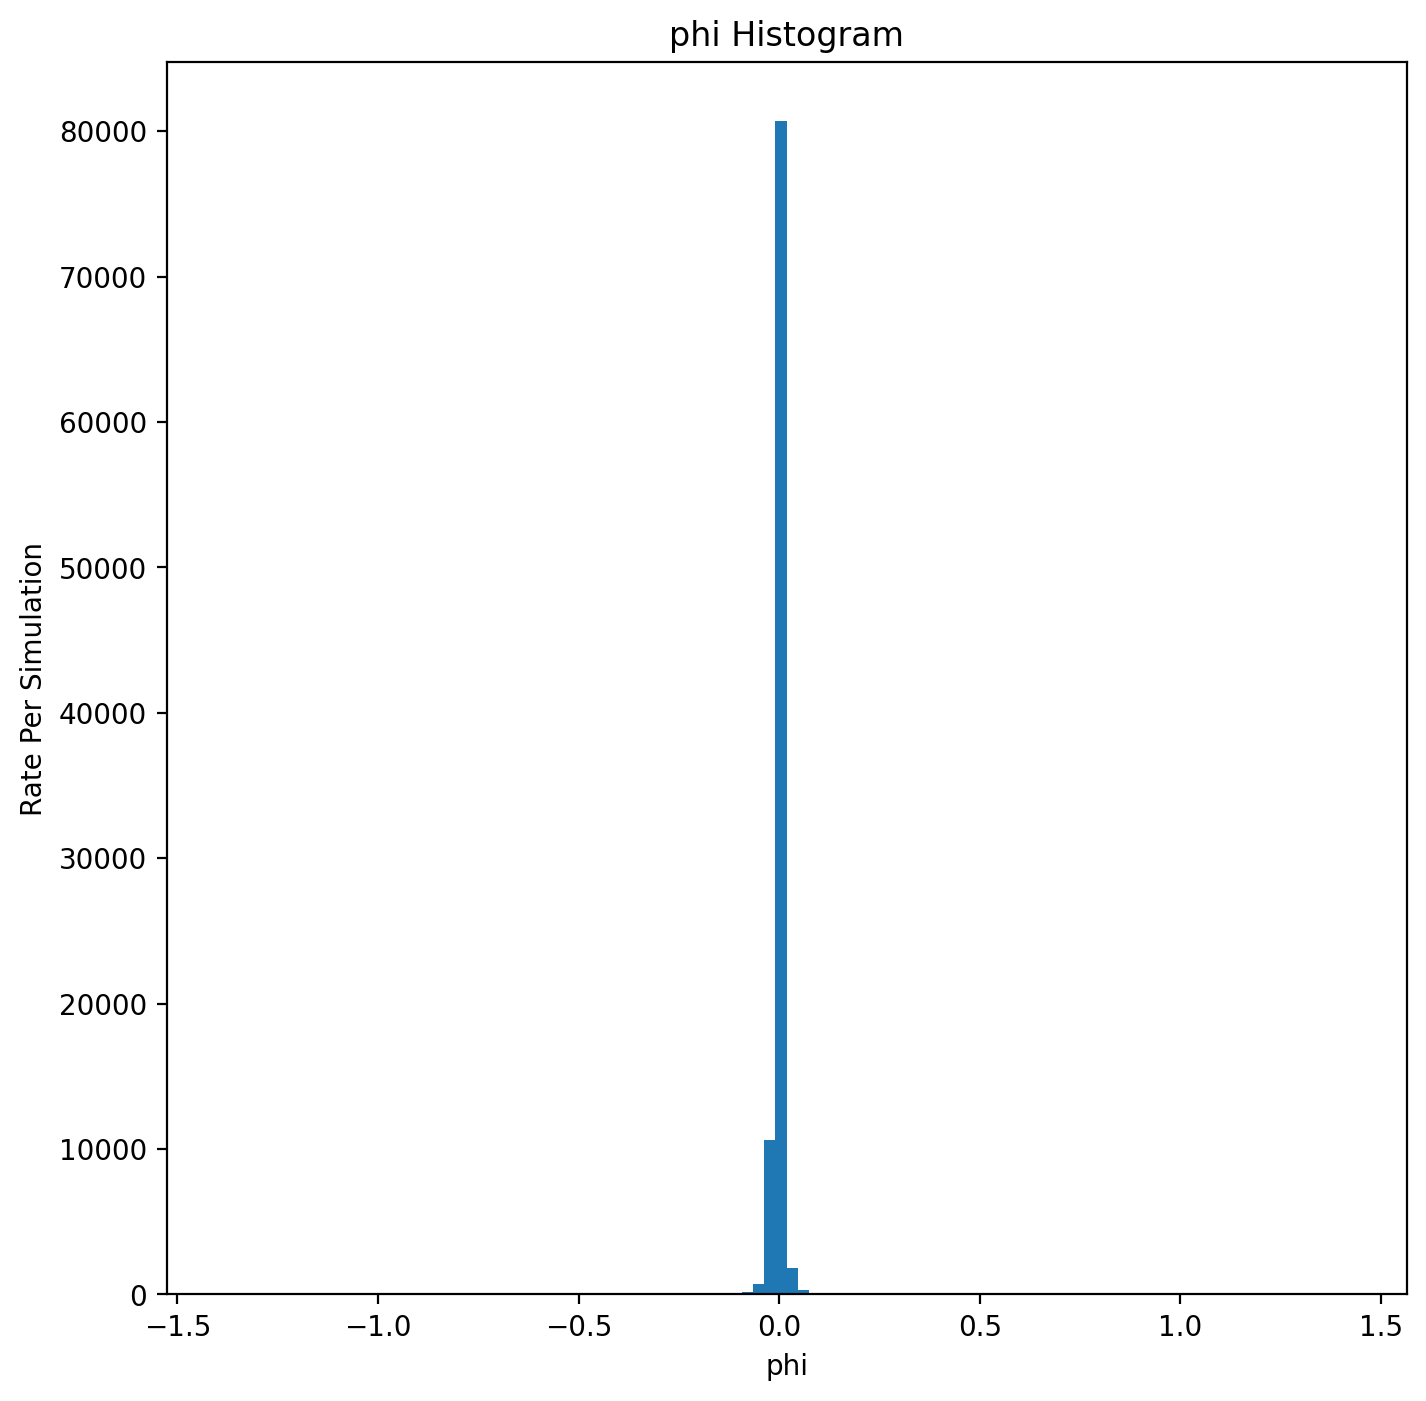

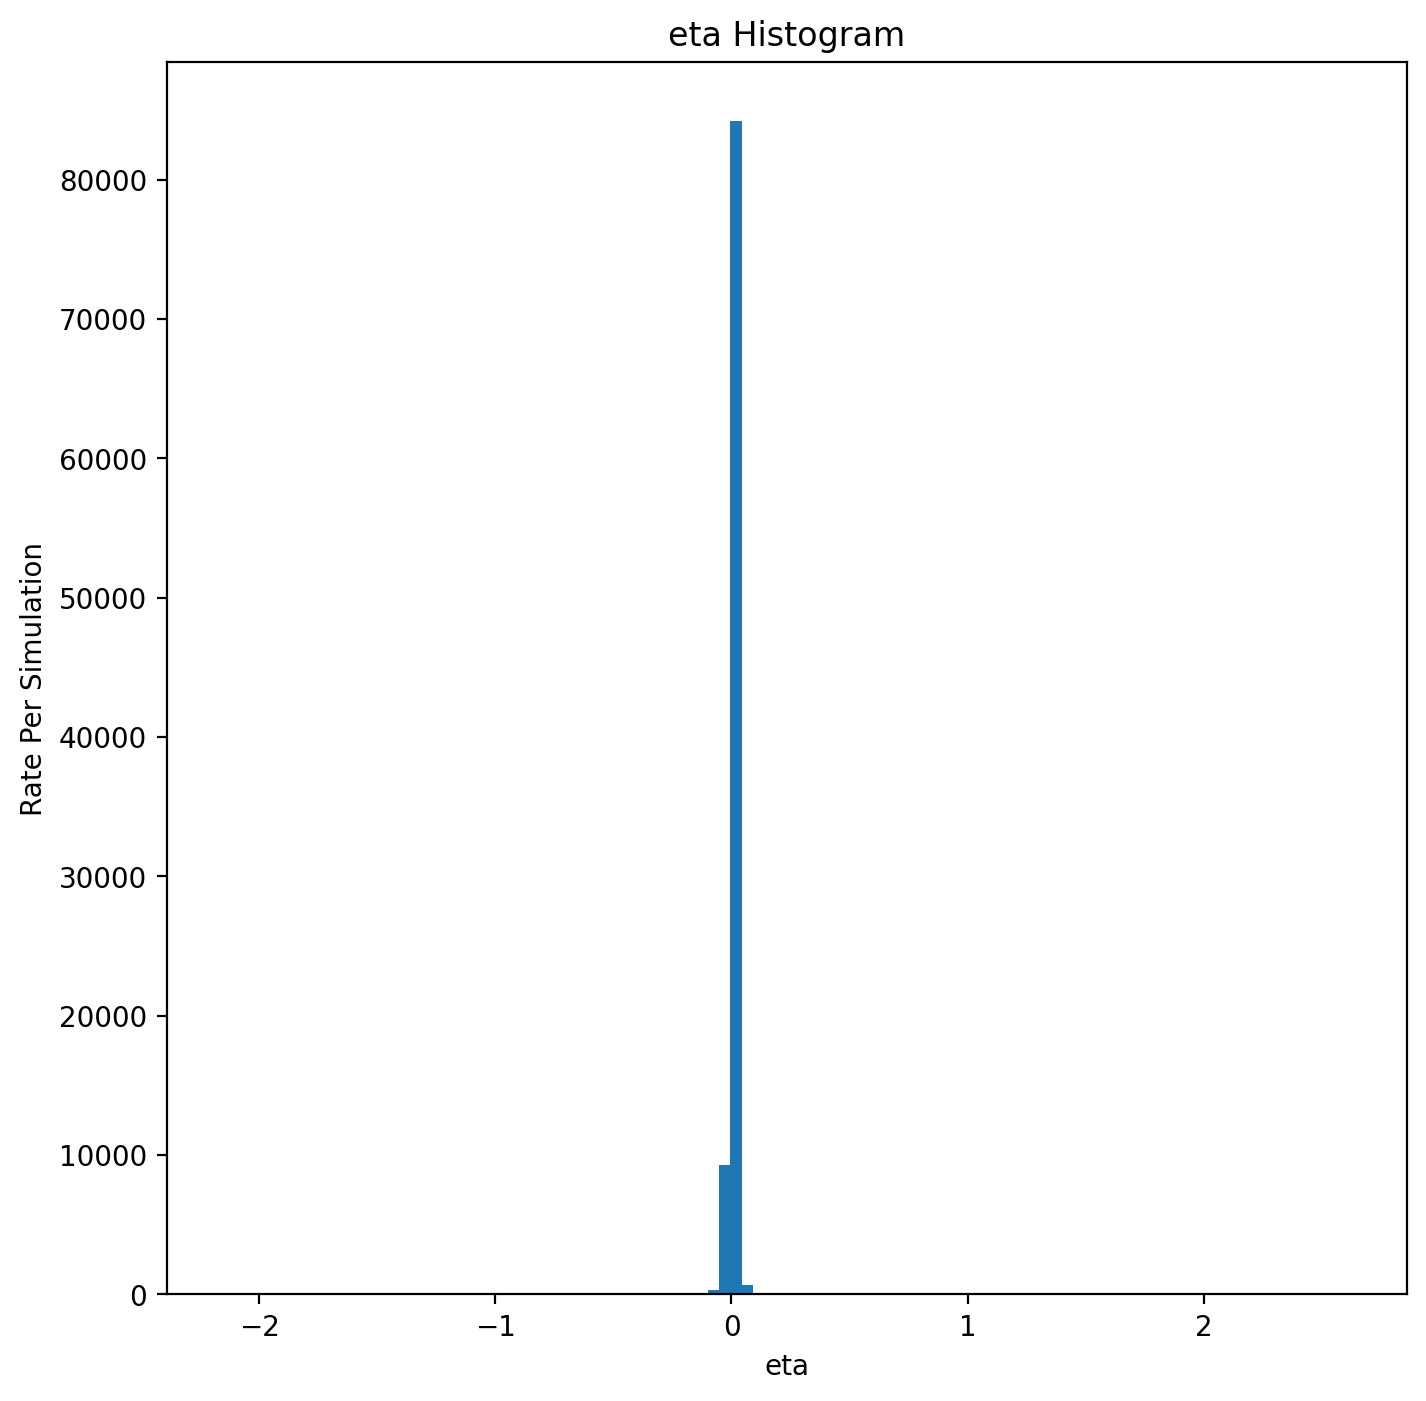

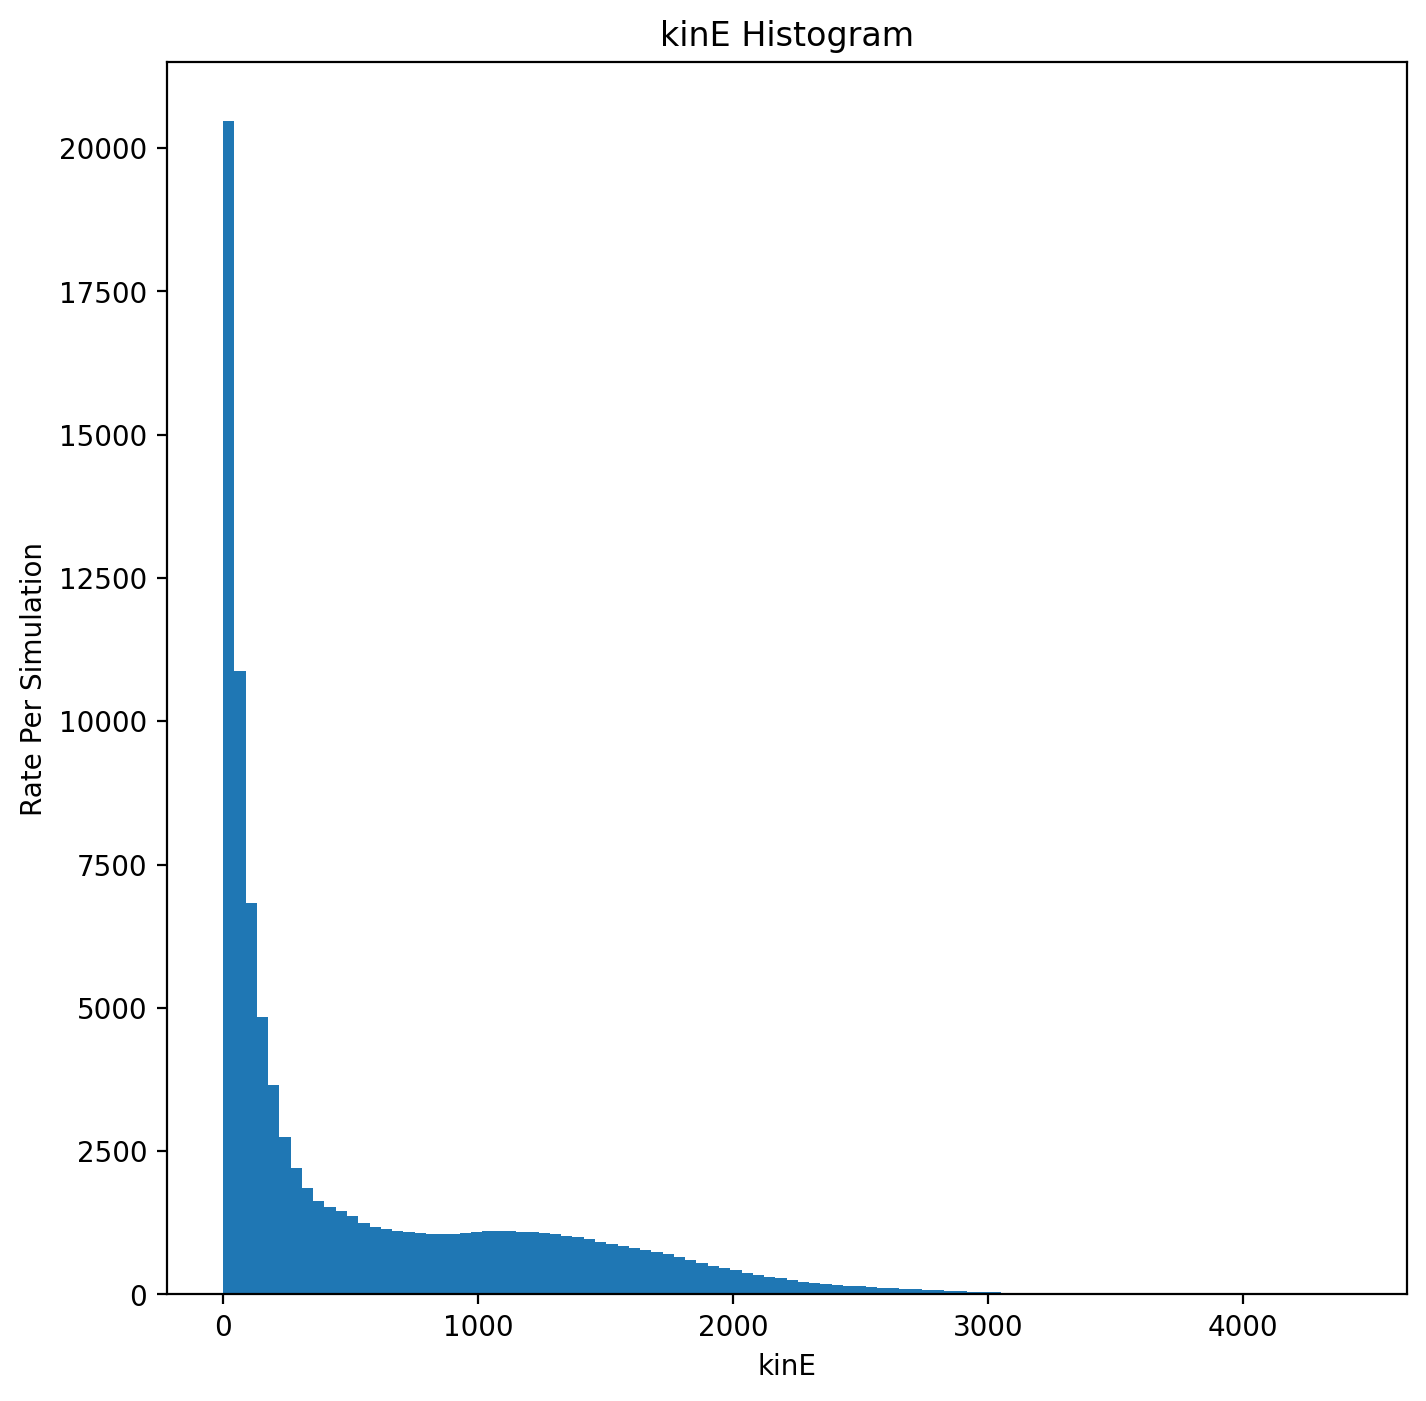

In [8]:
hist_arr = [[p, "p"], [pt, "pt"], [px, "px"], [py, "py"], [pz, "pz"], [z, "vx"], [-x, "vy"], [y, "vz" ], [theta, "theta"], [phi, "phi"], [eta, "eta"], [kinE, "kinE"]]

#input: number of mus per cm2 per GeV
#The numbers in the files must be normalized in order to get the fluence rate (flux) for 5Lo considering:
#the instantaneous luminosity: 5e34 cm-2 s-1 
#the cross section of the p-p collision: 85 mb = 85e-3*1e-24 cm2
#a normalization factor coming from the 2 step simulation approach: (7509624.0/1.0e8)/1.0e8
#with this normalisation factor, any quantity is given per primary p-p collision.
#therefore: 

n1 = 5.0*10**34
n2 = 85e-3*10**24
n3 = (7509624.0/(10**8))/(10**8)

N = n1*n2*n3

for i in hist_arr:
    plt.figure(figsize=(8,8), dpi=200)
    plt.hist(i[0], bins=100, weights=weight)
    plt.xlabel(i[1])
    plt.ylabel("Rate Per Simulation")
    plt.savefig(i[1] + "_histogram.png")
    plt.title(i[1] + " Histogram")
    plt.show()


(array([1.853247e+06, 1.122917e+06, 7.803200e+05, 5.808180e+05,
        4.482370e+05, 3.456430e+05, 2.802640e+05, 2.398300e+05,
        2.160300e+05, 2.068430e+05, 2.029060e+05, 1.978910e+05,
        1.895450e+05, 1.879480e+05, 1.868230e+05, 1.877450e+05,
        1.887370e+05, 1.912650e+05, 1.939300e+05, 1.981890e+05,
        2.004340e+05, 2.047830e+05, 2.084120e+05, 2.128830e+05,
        2.147390e+05, 2.154690e+05, 2.145600e+05, 2.138820e+05,
        2.099300e+05, 2.062750e+05, 2.016430e+05, 1.964450e+05,
        1.895850e+05, 1.818390e+05, 1.736700e+05, 1.668700e+05,
        1.582880e+05, 1.506570e+05, 1.424700e+05, 1.348470e+05,
        1.245380e+05, 1.146760e+05, 1.052890e+05, 9.568400e+04,
        8.658600e+04, 7.881300e+04, 7.101200e+04, 6.461800e+04,
        5.864100e+04, 5.300100e+04, 4.818900e+04, 4.396600e+04,
        4.021800e+04, 3.666300e+04, 3.349900e+04, 3.080300e+04,
        2.815600e+04, 2.573200e+04, 2.353300e+04, 2.159700e+04,
        1.934900e+04, 1.773200e+04, 1.61

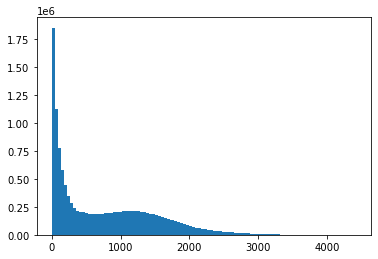

In [13]:
plt.hist(p, bins=100)

In [23]:
print(len(np.unique(np.round(weight,decimals=4))))
for i in np.unique(np.round(weight,decimals=4)):
    print(i)

271
0.003
0.0031
0.0032
0.0033
0.0034
0.0035
0.0036
0.0037
0.0038
0.0039
0.004
0.0041
0.0042
0.0043
0.0044
0.0045
0.0046
0.0047
0.0048
0.0049
0.005
0.0051
0.0052
0.0053
0.0054
0.0055
0.0056
0.0057
0.0058
0.0059
0.006
0.0061
0.0062
0.0063
0.0064
0.0065
0.0066
0.0067
0.0068
0.0069
0.007
0.0071
0.0072
0.0073
0.0074
0.0075
0.0076
0.0077
0.0078
0.0079
0.008
0.0081
0.0082
0.0083
0.0084
0.0085
0.0086
0.0087
0.0088
0.0089
0.009
0.0091
0.0092
0.0093
0.0094
0.0095
0.0096
0.0097
0.0098
0.0099
0.01
0.0101
0.0102
0.0103
0.0104
0.0105
0.0106
0.0107
0.0108
0.0109
0.011
0.0111
0.0112
0.0113
0.0114
0.0115
0.0116
0.0117
0.0118
0.0119
0.012
0.0121
0.0122
0.0123
0.0124
0.0125
0.0126
0.0127
0.0128
0.0129
0.013
0.0131
0.0132
0.0133
0.0134
0.0135
0.0136
0.0137
0.0138
0.0139
0.014
0.0141
0.0142
0.0143
0.0144
0.0145
0.0146
0.0147
0.0148
0.0149
0.015
0.0151
0.0152
0.0153
0.0154
0.0155
0.0156
0.0157
0.0158
0.0159
0.016
0.0161
0.0162
0.0163
0.0164
0.0165
0.0166
0.0167
0.0168
0.0169
0.017
0.0171
0.0172
0.0173
0.01

In [11]:
vx = z
vy = -x
vz = y

In [14]:
print("max z: " + str(np.max(vz)))
print("min z: " + str(np.min(vz)))

print("max y: " + str(np.max(vy)))
print("min y: " + str(np.min(vy)))

print("max x: " + str(np.max(vx)))
print("min x: " + str(np.min(vx)))

#Appears detector is 900 cm in z, 1050cm in y, 97cm in x

max z: 699.9939020999346
min z: -199.99994979472467
max y: 399.9997851353015
min y: -649.9998987786716
max x: 61757.1148732544
min x: 61660.45344659148


(array([ 459.88960204,  466.10599018,  477.81370162,  484.92463607,
         497.21108565,  509.86322312,  528.11140836,  541.29069382,
         557.09394162,  565.15339554,  581.88437668,  599.70792117,
         604.07526298,  609.46903879,  628.46183326,  641.9138679 ,
         653.78782833,  666.59021741,  686.62459577,  713.71419895,
         736.04524563,  765.38789134,  783.18966898,  804.79529137,
         826.62419956,  863.57086675,  893.05474658,  938.61855777,
         971.93599157, 1013.95967531, 1043.65195793, 1069.93995834,
        1060.1352274 ,  996.13862061,  936.74160768,  915.52438518,
         948.95781691, 1028.26419511, 1129.89213543, 1245.85886521,
        1349.40098738, 1475.34419117, 1607.54066462, 1761.35617386,
        1837.45213539, 1762.96669604, 1609.21862924, 1463.10854693,
        1335.58056552, 1222.4294173 , 1111.63102714, 1008.84237195,
         946.99372139,  921.22276869,  948.14036672, 1020.84473072,
        1062.84343533, 1051.99380522, 1019.00506

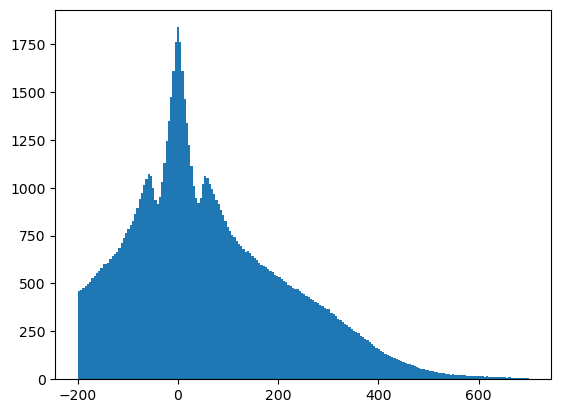

In [9]:
plt.hist(y, bins = 200, weights=weight)